# DS/ML Profiles and Industry Status
## Final project in Data Analyst 


### Introduction
As a person who is getting into the field of data science, I am interested in learning about the different tools and skills required for this type of profession, as well as being able to observe a general state of the industry. This 2022 survey organized by the Kaggle team, compiles several questions with this thematic and gives us the opportunity to perform an analysis to describe the different profiles we can find in Data Science and Machine Learning.

According to the latest McKinsey Global Survey in 2021, it is evident that the adoption of AI is steadily increasing and the advantages it offers are still substantial. A significant number of participants in the survey reported that their organizations have implemented AI capabilities, as they witness its positive influence on their financial performance. The goal of this notebook is to extract insights from the responses of 2022 Kaggle Machine Learning & Data Science (DS/ML) Survey about the state of DS/ML in the industry in 2022 as well as about the profile DS/ML landscape in the market.


### Approach
What is the trajectory for different job roles and how is the knowledge of tools and the experience acquired reflected in the economic income?
- What are the tools that each individual needs to know according to their job role and how much experience do they need?
- Where do the users come from?


### Objectives
- Show an economic and demographic analysis of the Industry in relation to job roles. This can be shown as an introduction to the reasons why people decide to choose these DS/ML focused professions.
- To show an analysis of the tools and classification of tools that form the different job profiles/roles. It is presented in this order with the purpose of narrating the different paths that people interested in developing their professional life in this branch can take. Finally, a relationship between skills and economic income is shown.

In [1]:
#Importar librerías
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.graph_objects as go


In [2]:
# cargar los datos

df = pd.read_csv('kaggle_survey_2022_responses.csv' , encoding='utf-8')

C:\Users\usuario\AppData\Local\Temp\ipykernel_7412\1811560420.py:3: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('kaggle_survey_2022_responses.csv' , encoding='utf-8')


### Methodology
The stages and tools used in each stage are described in the following diagram

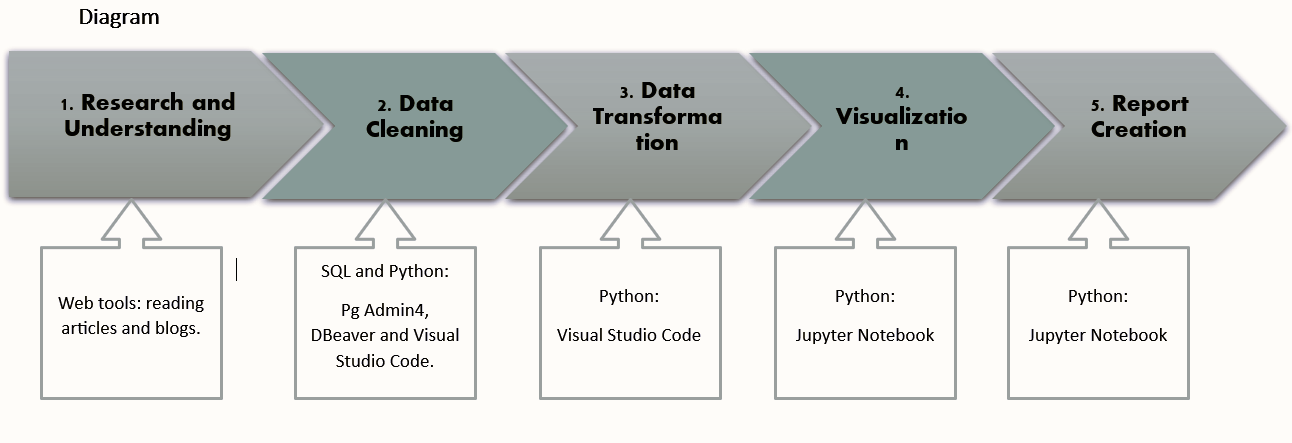

### Data Cleaning
The first step is to look at the columns, and modify the data type if necessary. Then we take into account the following premises to perform the cleaning:

- Remove records with the strings 'I do not wish to disclose my location' in the column 'Q4' representing the respondents' country of origin, since a demographic approach is required in the first visuals.
- We will now focus on filtering out those inconsistencies that may arise based on three questions regarding experience and academic degree.
  - The first issue is to eliminate inconsistencies of 18 to 21 year olds who aspire to have a phD degree (Q8) within 2 years or less.

  - The second issue is to apply a filter with young people (under 29 years old) whose response in terms of programming experience (Q11) is greater than 20 years, greater than 10 years, and greater than 5 years as the case may be.

  - The third question is to apply the same logic of the previous filter but in the question of experience with Machine Learning (Q16).

In [3]:
# observar los datos

df.head()

Duration (in seconds)                           Q2  \
0  Duration (in seconds)  What is your age (# years)?   
1                    121                        30-34   
2                    462                        30-34   
3                    293                        18-21   
4                    851                        55-59   

                                       Q3  \
0  What is your gender? - Selected Choice   
1                                     Man   
2                                     Man   
3                                     Man   
4                                     Man   

                                          Q4  \
0  In which country do you currently reside?   
1                                      India   
2                                    Algeria   
3                                      Egypt   
4                                     France   

                                                  Q5  \
0  Are you currently a student? (high school, uni...   
1                                                 No   
2                                                 No   
3                                                Yes   
4                                                 No   

                                                Q6_1  \
0  On which platforms have you begun or completed...   
1                                                NaN   
2                                                NaN   
3                                           Coursera   
4                                           Coursera   

                                                Q6_2  \
0  On which platforms have you begun or completed...   
1                                                NaN   
2                                                NaN   
3                                                edX   
4                                                NaN   

                                                Q6_3  \
0  On which platforms have you begun or completed...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                               Kaggle Learn Courses   

                                                Q6_4  \
0  On which platforms have you begun or completed...   
1                                                NaN   
2                                                NaN   
3                                           DataCamp   
4                                                NaN   

                                                Q6_5  ...  \
0  On which platforms have you begun or completed...  ...   
1                                                NaN  ...   
2                                                NaN  ...   
3                                                NaN  ...   
4                                                NaN  ...   

                                               Q44_3  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                               Q44_4  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   
2                                                NaN   
3                    Kaggle (notebooks, forums, etc)   
4                    Kaggle (notebooks, forums, etc)   

                                               Q44_5  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  Course Forums (forums.fast.ai, Coursera forums...   

                                     

In [4]:
# La primer fila se repite así que la saltamos 
df = df[1:]
#Revisar el tipo de datos y los datos nulos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23997 entries, 1 to 23997
Columns: 296 entries, Duration (in seconds) to Q44_12
dtypes: object(296)
memory usage: 54.2+ MB


In [5]:
#Saber el tipo de dato de la primer columna
tipo_dato = df.iloc[:, 0].dtypes
print("Tipo de datos de la primera columna:", tipo_dato)

#modificar el tipo de datos de la primera columna
df.iloc[:, 0] = df.iloc[:, 0].astype(int)


Tipo de datos de la primera columna: object


In [6]:
#eliminar los registros con los strings 'I do not wish to disclose my location' en la columna 'Q4'
#df = df.drop(df[(df['Q4'] == 'Other') | (df['Q4'] == 'I do not wish to disclose my location')].index)
df = df[~df['Q4'].isin(['I do not wish to disclose my location'])]
# Verificar el DataFrame después de eliminar los registros
#print(df)

In [7]:
#Checar valores unicos del listado de países

valores_unicos = df['Q4'].unique()
print("Valores únicos de la columna 'columna_nombre':", valores_unicos)

Valores únicos de la columna 'columna_nombre': ['India' 'Algeria' 'Egypt' 'France' 'Germany' 'Australia' 'Other'
 'South Korea' 'United States of America' 'Pakistan' 'Mexico' 'Singapore'
 'Italy' 'Taiwan' 'China' 'Argentina' 'Turkey' 'Brazil' 'Nigeria' 'Chile'
 'Japan' 'Canada' 'Indonesia' 'Israel' 'Colombia' 'Russia'
 'United Kingdom of Great Britain and Northern Ireland' 'Ethiopia'
 'South Africa' 'Viet Nam' 'Kenya' 'Spain' 'Iran, Islamic Republic of...'
 'Cameroon' 'Tunisia' 'Peru' 'Nepal' 'Morocco' 'Philippines' 'Ecuador'
 'Thailand' 'United Arab Emirates' 'Bangladesh' 'Netherlands' 'Zimbabwe'
 'Ghana' 'Portugal' 'Poland' 'Saudi Arabia' 'Romania' 'Czech Republic'
 'Malaysia' 'Sri Lanka' 'Hong Kong (S.A.R.)' 'Ukraine' 'Belgium' 'Ireland']


In [8]:
#Cambiar algunos nombres de países 
df['Q4'] = df['Q4'].replace({"United States of America": "USA",
                             "United Kingdom of Great Britain and Northern Ireland": "UK",
                             "Hong Kong (S.A.R.)": "China",
                             "Iran, Islamic Republic of...": "Iran",
                             "United Arab Emirates": "UAE",
                             "Viet Nam": "Vietnam"})

valores_unicos = df['Q4'].unique()
print("Valores únicos de la columna 'Country':", valores_unicos)
#print(df['Q4'].value_counts())

Valores únicos de la columna 'Country': ['India' 'Algeria' 'Egypt' 'France' 'Germany' 'Australia' 'Other'
 'South Korea' 'USA' 'Pakistan' 'Mexico' 'Singapore' 'Italy' 'Taiwan'
 'China' 'Argentina' 'Turkey' 'Brazil' 'Nigeria' 'Chile' 'Japan' 'Canada'
 'Indonesia' 'Israel' 'Colombia' 'Russia' 'UK' 'Ethiopia' 'South Africa'
 'Vietnam' 'Kenya' 'Spain' 'Iran' 'Cameroon' 'Tunisia' 'Peru' 'Nepal'
 'Morocco' 'Philippines' 'Ecuador' 'Thailand' 'UAE' 'Bangladesh'
 'Netherlands' 'Zimbabwe' 'Ghana' 'Portugal' 'Poland' 'Saudi Arabia'
 'Romania' 'Czech Republic' 'Malaysia' 'Sri Lanka' 'Ukraine' 'Belgium'
 'Ireland']


In [9]:
#Ahora vamos a analizar la pregunta Q8 de grado academico y aplicar un filtro a personas jovenes con doctorado
conteo = df['Q8'].value_counts()['I prefer not to answer']

filtro1 = ~((df['Q8'].isin(['Doctoral degree', 'Professional doctorate'])) & 
           (df['Q2'].isin(['18-21'])))

df = df[filtro1]
#'~' para la negación lógica y los métodos isin() y [] del DF de pandas para aplicar los filtros necesarios.

In [10]:
#Aplicamos un 2do filtro con respecto a los años de experiencia y edad
filtro2 = ~((df['Q11'] == '20+ years') & 
           (df['Q2'].isin(['18-21', '22-24', '25-29'])))
df = df[filtro2]

filtro3 = ~((df['Q11'] == '10-20 years') & 
           (df['Q2'].isin(['18-21', '22-24'])))
df = df[filtro3]

filtro4 = ~((df['Q11'] == '5-10 years') & 
           (df['Q2'].isin(['18-21'])))
df = df[filtro4]
#df

In [11]:
#Aplicar también esos filtros de edad en la experiencia en ML
filtro5 = ~((df['Q16'] == '20+ years') & 
           (df['Q2'].isin(['18-21', '22-24', '25-29'])))
df = df[filtro5]

filtro6 = ~((df['Q16'] == '10-20 years') & 
           (df['Q2'].isin(['18-21', '22-24'])))
df = df[filtro6]

filtro7 = ~((df['Q16'] == '5-10 years') & 
           (df['Q2'].isin(['18-21'])))
df = df[filtro7]

### Transformation
In this stage we will concentrate on transforming those multiple choice questions that have generated multiple columns, for this we first decide which columns, according to the insights, we should concatenate and how many values of these multiple options we should choose. Here we take as a reference the statistical study of a contestant in Kaggle (https://www.kaggle.com/code/eraikako/data-science-and-mlops-landscape-in-industry) who concluded that most people answered with 2 or 3 options to each question. So we only take 3 or less answers to each of these questions. 

"Only 2% of the respondents in the scope have an average number of selections greater than 3, which cannot affect the results of the analysis. Also, it doesn't necessarily mean that we have to address them as outliers. One explanation would be that they might have many years of coding or ML experience, so makes sense to be familiar with many frameworks and work with a variety of libraries." 

In addition, we made queries for gaps, 'nan' or 'None' values in order to discard questions that did not provide sufficient information.

In [12]:
#Vamos a checar cuáles preguntas tienen multiple choice que generen tantas columnas
unique_column = df.columns.unique()
# Imprimir los valores únicos en los encabezados de cada columna
for valor in unique_column:
    print(valor)

Duration (in seconds)
Q2
Q3
Q4
Q5
Q6_1
Q6_2
Q6_3
Q6_4
Q6_5
Q6_6
Q6_7
Q6_8
Q6_9
Q6_10
Q6_11
Q6_12
Q7_1
Q7_2
Q7_3
Q7_4
Q7_5
Q7_6
Q7_7
Q8
Q9
Q10_1
Q10_2
Q10_3
Q11
Q12_1
Q12_2
Q12_3
Q12_4
Q12_5
Q12_6
Q12_7
Q12_8
Q12_9
Q12_10
Q12_11
Q12_12
Q12_13
Q12_14
Q12_15
Q13_1
Q13_2
Q13_3
Q13_4
Q13_5
Q13_6
Q13_7
Q13_8
Q13_9
Q13_10
Q13_11
Q13_12
Q13_13
Q13_14
Q14_1
Q14_2
Q14_3
Q14_4
Q14_5
Q14_6
Q14_7
Q14_8
Q14_9
Q14_10
Q14_11
Q14_12
Q14_13
Q14_14
Q14_15
Q14_16
Q15_1
Q15_2
Q15_3
Q15_4
Q15_5
Q15_6
Q15_7
Q15_8
Q15_9
Q15_10
Q15_11
Q15_12
Q15_13
Q15_14
Q15_15
Q16
Q17_1
Q17_2
Q17_3
Q17_4
Q17_5
Q17_6
Q17_7
Q17_8
Q17_9
Q17_10
Q17_11
Q17_12
Q17_13
Q17_14
Q17_15
Q18_1
Q18_2
Q18_3
Q18_4
Q18_5
Q18_6
Q18_7
Q18_8
Q18_9
Q18_10
Q18_11
Q18_12
Q18_13
Q18_14
Q19_1
Q19_2
Q19_3
Q19_4
Q19_5
Q19_6
Q19_7
Q19_8
Q20_1
Q20_2
Q20_3
Q20_4
Q20_5
Q20_6
Q21_1
Q21_2
Q21_3
Q21_4
Q21_5
Q21_6
Q21_7
Q21_8
Q21_9
Q21_10
Q22
Q23
Q24
Q25
Q26
Q27
Q28_1
Q28_2
Q28_3
Q28_4
Q28_5
Q28_6
Q28_7
Q28_8
Q29
Q30
Q31_1
Q31_2
Q31_3
Q31_4
Q31_5
Q31_6
Q31_7


In [13]:
df['Q11'] = df['Q11'].astype(str)
# Reemplazar los valores que consideras como "faltantes" por np.nan
df['Q11'] = df['Q11'].replace(['', ' ', 'otro_valor_faltante'], np.nan)

# Eliminar las filas con valores faltantes en la columna 'Q11'
df = df.dropna(subset=['Q11'])
print(df.Q11)

1                nan
2          1-3 years
3          1-3 years
4        10-20 years
5         5-10 years
            ...     
23993      3-5 years
23994      20+ years
23995      < 1 years
23996      3-5 years
23997      1-3 years
Name: Q11, Length: 23772, dtype: object


In [14]:
#df['Q12'] = df[['Q12_1', 'Q12_2', 'Q12_3', 'Q12_4', 'Q12_5', 'Q12_6', 'Q12_7', 'Q12_8', 'Q12_9', 'Q12_10', 'Q12_11', 'Q12_12', 'Q12_13', 'Q12_14', 'Q12_15']].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
#Dentro de la función lambda, se seleccionan las columnas utilizando x[['Q12_1', 'Q12_2', ..., 'Q12_15']], se eliminan valores nulos dropna()
df['Q12'] = df.apply(lambda x: '='.join(x[['Q12_1', 'Q12_2', 'Q12_3', 'Q12_4', 'Q12_5', 'Q12_6', 'Q12_7', 'Q12_8', 'Q12_9', 'Q12_10', 'Q12_11', 'Q12_12', 'Q12_13', 'Q12_14', 'Q12_15']].dropna().astype(str)), axis=1)

df['Q12'] = df['Q12'].astype(str)

# Reemplazar los valores que consideras como "faltantes" por np.nan
df['Q12'] = df['Q12'].replace(['', ' ', 'otro_valor_faltante'], np.nan)

# Eliminar las filas con valores faltantes en la columna 'Q12'
df = df.dropna(subset=['Q12'])
print(df.Q12)

2                       Java
3        Python=SQL=C=MATLAB
4            Python=SQL=Bash
5            Python=C++=Java
6                 Python=SQL
                ...         
23993           Python=R=SQL
23994             Python=SQL
23995             Python=SQL
23996          Python=R=Bash
23997      Python=Javascript
Name: Q12, Length: 20929, dtype: object


In [15]:
count_none = df['Q12'].value_counts()['None']

print(f"Existen {count_none} ocurrencias de 'None' en la columna Q12.")
#Entonces sí existen 'None', y los que eliminamos fueron los que no contestaron a Q12

Existen 255 ocurrencias de 'None' en la columna Q12.


In [16]:
#Hacer un ciclo for para concatenar las columnas y ver si sale bien D:
#En este ejemplo, se itera sobre la lista de columnas a juntar (columnas_juntar) y
# el número correspondiente de columnas para cada categoría (num_columnas). Se crea una
# nueva columna para cada categoría y se utiliza un segundo ciclo for para concatenar los valores 
# de las columnas individuales en la nueva columna. Finalmente, se elimina la última coma de la concatenación.

columnas_juntar = ['Q13', 'Q14', 'Q15', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q28', 'Q31', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37',
                   'Q38', 'Q39', 'Q40', 'Q42']  # Nombres de las columnas a juntar

for columna in columnas_juntar:
    df[columna] = df[[col for col in df.columns if col.startswith(columna)]].apply(
        lambda x: '='.join(x.dropna().astype(str)), axis=1
    )

# Imprimir el DataFrame con las nuevas columnas
#print(df)

In [17]:
#Convertir las columnas relevantes a str
columns_to_convert = ['Q4', 'Q12', 'Q13', 'Q14', 'Q15', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24',
                      'Q25', 'Q26', 'Q28', 'Q29', 'Q31', 'Q33','Q34', 'Q35', 'Q36', 'Q37','Q38', 'Q39', 'Q40', 'Q42']
df[columns_to_convert] = df[columns_to_convert].astype(str)

In [18]:
#En esta casilla estamos probando imprimir cada columna concatenada y verificar que todo salió bien
# 'Q15', 'Q17', 'Q18', 'Q21', 'Q28', 'Q31', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42'
df['Q43'] = df['Q43'].astype(str)
print(df.Q43)

2              nan
3              nan
4        2-5 times
5              nan
6              nan
           ...    
23993          nan
23994          nan
23995        Never
23996          nan
23997          nan
Name: Q43, Length: 20929, dtype: object


In [19]:
#Arreglamos unos problemas con la columna 'Q18', 'Q19' y 'Q20'
df['Q18'] = df['Q18'].astype(str)
df['Q18'] = df['Q18'].replace({
    "Gradient Boosting Machines (xgboost, lightgbm, etc)": "Gradient Boosting Machines", 
    "Dense Neural Networks (MLPs, etc)": "Dense Neural Networks",
    "Transformer Networks (BERT, gpt-3, etc)": "Transformer Networks",
    "Autoencoder Networks (DAE, VAE, etc)": "Autoencoder Networks", "Autoencoder Networks (DAE": "Autoencoder Networks"})

df['Q19'] = df['Q19'].astype(str)
df['Q19'] = df['Q19'].replace({
    "General purpose image/video tools (PIL, cv2, skimage, etc)": "General purpose image/video tools", 
    "Image segmentation methods (U-Net, Mask R-CNN, etc)": "Image segmentation methods",
    "Object detection methods (YOLOv6, RetinaNet, etc)": "Object detection methods",
    "Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)": "Image classification and other general purpose networks",
    "Vision transformer networks (ViT, DeiT, BiT, BEiT, Swin, etc)": "Vision transformer networks",
    "Generative Networks (GAN, VAE, etc)": "Generative Networks"})

df['Q20'] = df['Q20'].astype(str)
df['Q20'] = df['Q20'].replace({
    "Word embeddings/vectors (GLoVe, fastText, word2vec)": "Word embeddings/vectors", 
    "Encoder-decoder models (seq2seq, vanilla transformers)": "Encoder-decoder models",
    "Contextualized embeddings (ELMo, CoVe)": "Contextualized embeddings",
    "Transformer language models (GPT-3, BERT, XLnet, etc)": "Transformer language models"})

#unique_values = df['Q20'].unique()
#print(unique_values)

In [20]:
valores_u = df['Q23'].unique()
print(valores_u)

['nan' 'Data Scientist' 'Software Engineer' 'Research Scientist' 'Other'
 'Developer Advocate'
 'Data Analyst (Business, Marketing, Financial, Quantitative, etc)'
 'Data Engineer' 'Currently not employed'
 'Machine Learning/ MLops Engineer' 'Engineer (non-software)'
 'Teacher / professor'
 'Manager (Program, Project, Operations, Executive-level, etc)'
 'Statistician' 'Data Administrator' 'Data Architect']


In [21]:
df['Q23'] = df['Q23'].astype(str)  # Cambiar el tipo de datos a cadena (string)
#df['Q23'] = df['Q23'].replace('Data Analyst (Business, Marketing, Financial, Quantitative, etc)', 'Data Analyst', regex=True)
#df['Q23'] = df['Q23'].replace('Manager (Program, Project, Operations, Executive-level, etc)', 'Manager', regex=True)
df['Q23'] = df['Q23'].replace({"Data Analyst (Business, Marketing, Financial, Quantitative, etc)": "Data Analyst",
                             "Manager (Program, Project, Operations, Executive-level, etc)": "Manager",
                             "Machine Learning/ MLops Engineer": "ML/MLops Engineer", "Developer Advocate": "Dev Advocate"
                             })

#conteo = df['Q23'].isna().sum()
conteo = df['Q23'].value_counts()['Other']
print(conteo)

553


In [22]:
#Juntar las columnas con un # de cadenas de palabras
df['Q12'] = df['Q12'].str.split('=').str[:3].str.join('=')
df['Q13'] = df['Q13'].str.split('=').str[:3].str.join('=')
df['Q14'] = df['Q14'].str.split('=').str[:3].str.join('=')
df['Q15'] = df['Q15'].str.split('=').str[:3].str.join('=')
df['Q17'] = df['Q17'].str.split('=').str[:3].str.join('=')
df['Q18'] = df['Q18'].str.split('=').str[:3].str.join('=')
df['Q19'] = df['Q19'].str.split('=').str[:3].str.join('=')
df['Q20'] = df['Q20'].str.split('=').str[:3].str.join('=')
df['Q21'] = df['Q21'].str.split('=').str[:3].str.join('=')
df['Q31'] = df['Q31'].str.split('=').str[:3].str.join('=')
df['Q33'] = df['Q33'].str.split('=').str[:3].str.join('=')
df['Q34'] = df['Q34'].str.split('=').str[:3].str.join('=')
df['Q35'] = df['Q35'].str.split('=').str[:3].str.join('=')
df['Q36'] = df['Q36'].str.split('=').str[:3].str.join('=')
df['Q37'] = df['Q37'].str.split('=').str[:3].str.join('=')
df['Q38'] = df['Q38'].str.split('=').str[:3].str.join('=')
df['Q39'] = df['Q39'].str.split('=').str[:3].str.join('=')
df['Q43'] = df['Q43'].str.split('=').str[:3].str.join('=')

#utilizamos str.split('=') para dividir la cadena de la columna
#utilizamos str[:3] para seleccionar los dos primeros elementos de la lista y luego str.join('=') para unirlos nuevamente
#Printear las columnas para checar que se concatenaron bien y q solo tenemos 3 elementos max.

## Visualization and Results



### Respondents by Country

Globally we can see that users who participated in this survey come from all inhabitable continents, in terms of proportion there is a notable participation in India with 7,528 records, followed by the USA with 2,657 records, Brazil with 742, Japan with 501 and China with 453 records. 

[The remarkable development in India may be due to its mathematical foundations within its educational system, backed by a strong educational infrastructure in engineering and computer science. The Indian government has taken steps to foster the growth of Data Science and Artificial Intelligence in the country. Policies and programs have been implemented to promote research, development and adoption of these technologies in various sectors.](https://www.analyticsindiamag.com/how-india-became-a-data-science-hub-its-impact-on-jobs-and-startups/)

In [23]:
# Calcular la suma de registros por país
sum_by_country = df.groupby('Q4').size().reset_index(name='Count')

# Crear el gráfico de mapa con plotly
fig = px.choropleth(sum_by_country, locations='Q4', locationmode='country names', color='Count',
                    title='Respondents by Country',
                    color_continuous_scale='plasma')

# Mostrar el gráfico
fig.show()

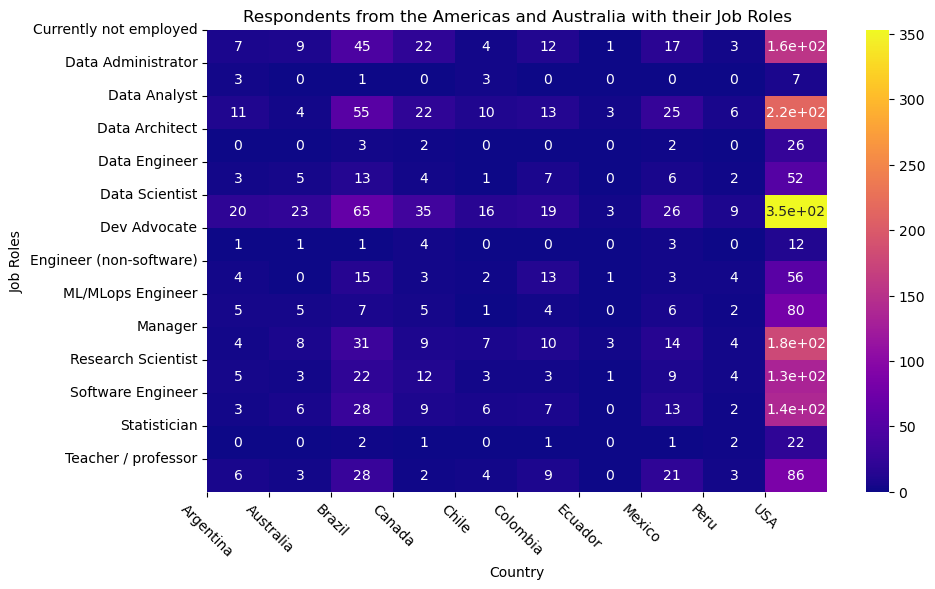

In [24]:
America = ['Argentina', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Ecuador', 'Mexico','Peru', 'USA', 'Australia']
Europa = ['Belgium', 'Czech Republic', 'France', 'Germany', 'Ireland', 'Italy', 'Ukraine', 'Netherlands', 'Poland', 'Portugal', 'Russia', 'Spain', 'UK', 'Romania', 'Turkey']
Africa = ['Argelia', 'Egypt', 'Ethiopia', 'Kenya', 'Nigeria', 'South Africa', 'Zimbabwe', 'Cameroon', 'Ghana', 'Morocco', 'Tunisia']
Asia = ['China', 'Bangladesh', 'Indonesia', 'India', 'Iran', 'Israel', 'Japan', 'Malaysia', 'Nepal', 'Pakistan', 'Philippines', 'Singapore', 'South Korea', 'Saudi Arabia', 'Sri Lanka', 'Taiwan', 'Thailand', 'UAE', 'Vietman']
Oceania = ['Australia']

# Filtrar los datos de los países de América y eliminar 'nan' y 'Other' en la columna 'Q23'
paises_america = df[df['Q4'].isin(America) & (df['Q23'] != 'nan') & (df['Q23'] != 'Other')]

# Calcular la matriz de conteo
count_matrix = pd.crosstab(paises_america['Q23'], paises_america['Q4'])

# Definir un mapa de colores personalizado
custom_cmap = sns.color_palette("plasma", as_cmap=True)

# Crear la figura y el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(count_matrix, cmap=custom_cmap, annot=True, cbar=True)

# Configurar los ejes y etiquetas
plt.title('Respondents from the Americas and Australia with their Job Roles')
plt.xticks(range(len(count_matrix.columns)), count_matrix.columns, rotation=315)
plt.yticks(range(len(count_matrix.index)), count_matrix.index)
plt.ylabel('Job Roles')
plt.xlabel('Country')

# Mostrar el gráfico
plt.show()


In the Americas, the leading countries in these professions are the USA, followed by Brazil, Canada and Mexico. The professions that have a notable count are Data Scientists, followed by Data Analysts, Data Managers and Software Engineers.

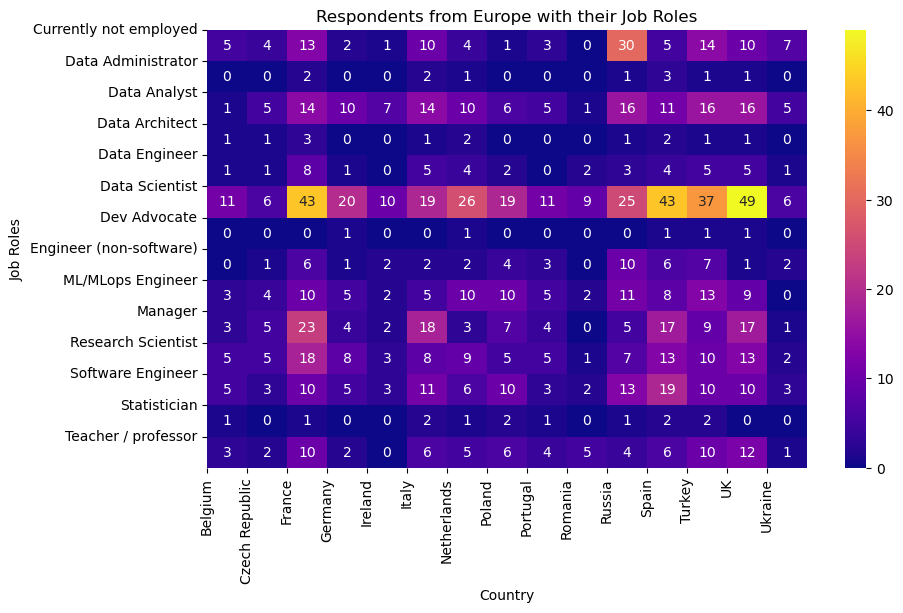

In [25]:
paises_eur = df[df['Q4'].isin(Europa) & (df['Q23'] != 'nan') & (df['Q23'] != 'Other')]
# Calcular la matriz de conteo
count_matrix = pd.crosstab(paises_eur['Q23'], paises_eur['Q4'])

# Definir un mapa de colores personalizado
custom_cmap = sns.color_palette("plasma", as_cmap=True)
plt.figure(figsize=(10, 6))
sns.heatmap(count_matrix, cmap=custom_cmap, annot=True, cbar=True)

# Configurar los ejes y etiquetas
plt.title('Respondents from Europe with their Job Roles')
plt.xticks(range(len(count_matrix.columns)), count_matrix.columns, rotation=90)
plt.yticks(range(len(count_matrix.index)), count_matrix.index)
plt.ylabel('Job Roles')
plt.xlabel('Country')


# Ajustar la separación entre las etiquetas de los ejes
plt.subplots_adjust(bottom=0.15, left=0.15)

# Mostrar el gráfico
plt.show()

There is a curiosity in Europe, the differences between each country are not so noticeable so we could say that there is a more homogeneous distribution of DS/ML professionals. The leading job roles in this continent are Data Scientist, Data Analyst, software Engineers and Research scientist.

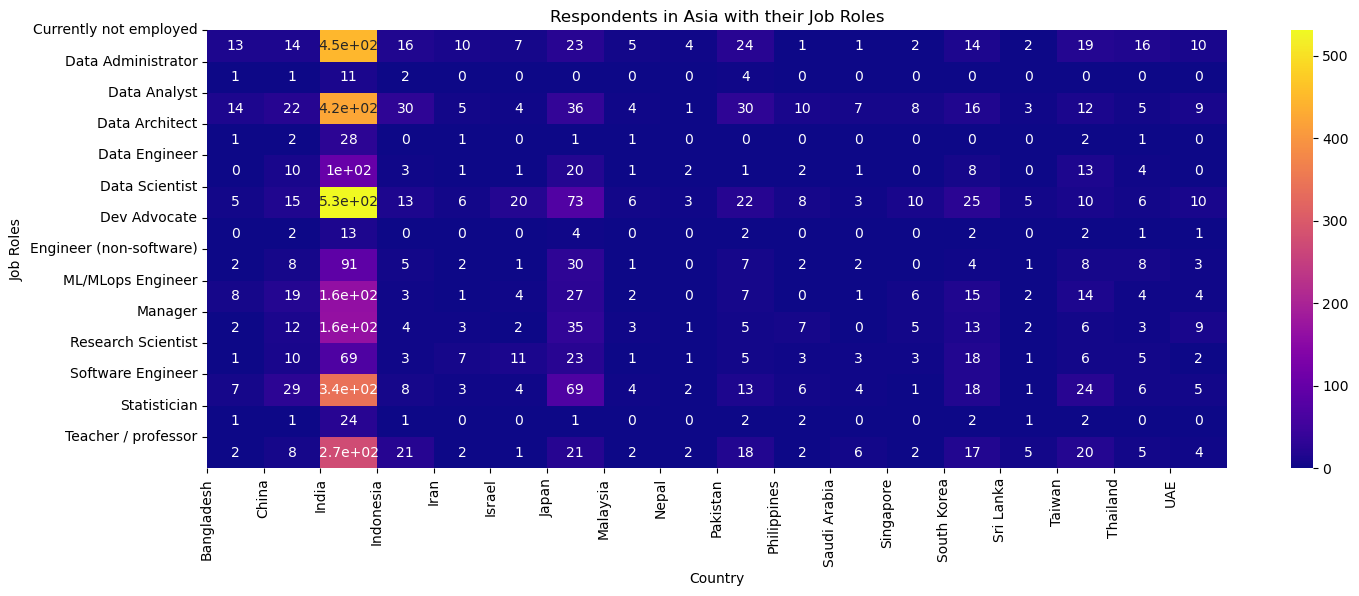

In [26]:
paises_asia = df[df['Q4'].isin(Asia) & (df['Q23'] != 'nan') & (df['Q23'] != 'Other')]
# Calcular la matriz de conteo
count_matrix = pd.crosstab(paises_asia['Q23'], paises_asia['Q4'])

# Definir un mapa de colores personalizado
custom_cmap = sns.color_palette("plasma", as_cmap=True)
plt.figure(figsize=(17, 6))
sns.heatmap(count_matrix, cmap=custom_cmap, annot=True, cbar=True)

# Configurar los ejes y etiquetas
plt.title('Respondents in Asia with their Job Roles')
plt.xticks(range(len(count_matrix.columns)), count_matrix.columns, rotation=90)
plt.yticks(range(len(count_matrix.index)), count_matrix.index)
plt.ylabel('Job Roles')
plt.xlabel('Country')

# Ajustar la separación entre las etiquetas de los ejes
plt.subplots_adjust(bottom=0.15, left=0.15)

# Mostrar el gráfico
plt.show()

This graph also shows the large number of professionals living in or coming from India, making a drastic difference with more than one third of the respondents; the next countries with the most professionals are Japan, China, South Korea and Taiwan. The most popular job roles are data scientists, data analysts, software engineers and teachers. It should also be noted that there are several unemployed people, making a noticeable difference compared to the other continents.

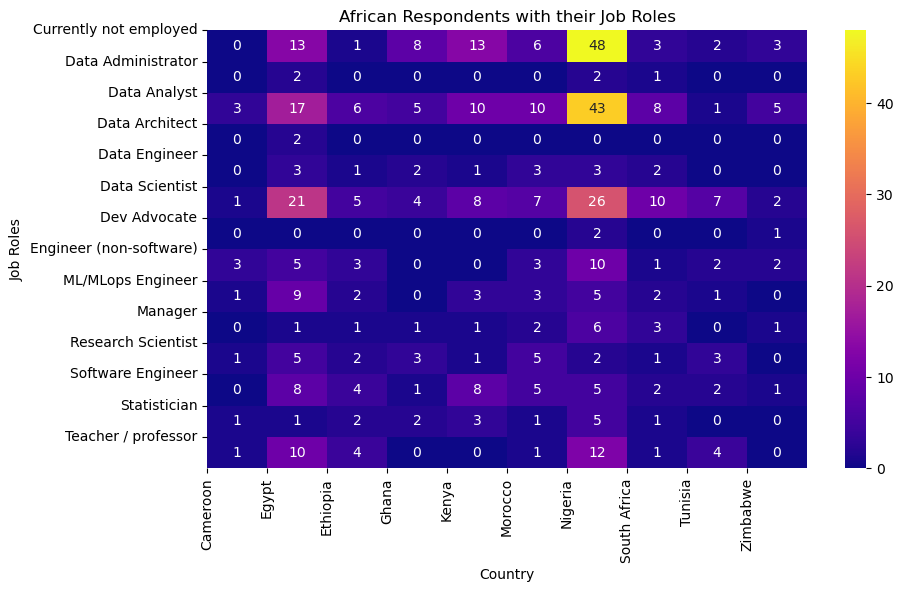

In [27]:
paises_africa = df[df['Q4'].isin(Africa) & (df['Q23'] != 'nan') & (df['Q23'] != 'Other')]
# Calcular la matriz de conteo
count_matrix = pd.crosstab(paises_africa['Q23'], paises_africa['Q4'])

# Definir un mapa de colores personalizado
custom_cmap = sns.color_palette("plasma", as_cmap=True)
plt.figure(figsize=(10, 6))
sns.heatmap(count_matrix, cmap=custom_cmap, annot=True, cbar=True)

# Configurar los ejes y etiquetas
plt.title('African Respondents with their Job Roles')
plt.xticks(range(len(count_matrix.columns)), count_matrix.columns, rotation=90)
plt.yticks(range(len(count_matrix.index)), count_matrix.index)
plt.ylabel('Job Roles')
plt.xlabel('Country')

# Ajustar la separación entre las etiquetas de los ejes
plt.subplots_adjust(bottom=0.15, left=0.15)

# Mostrar el gráfico
plt.show()


Africa's underdevelopment in these professions may be due to several factors but I would like to highlight one: its socio-economic context. [Socio-economic challenges such as poverty, lack of access to basic services and disparities in wealth distribution can hinder investment and adoption of advanced technologies in AI/Data Science/Machine Learning. Lack of resources and opportunities may relegate these disciplines to the background compared to other more pressing needs.](https://africansonai.com/africa-artificial-intelligence-and-machine-learning-index-2020/)

Despite these issues there are some countries that stand out: Nigeria, Egypt and Kenya, their main job roles are Data Analyst, Data Scientist and teachers, but it is worth noting that most of the interviewees at that time were unemployed.

### International Industry by Job Role

This graph shows the distribution of job roles and the industry in which they develop their skills. We can see that Data Scientists are leading in this survey and the combination of these professionals in the Computer/Technology industry is the second most prominent, the combination with the highest frequency is teachers working in the education industry.

It should be described that professionals have the following job roles in order: 

1.- Data Scientists, after the Computer/Technology industry Finance, Education, Internet Services and Medical/Pharmaceutical stand out. 

2.- Data Analyst, also leading the Computing, Finance and Education, but unlike the previous one, followed by the Sales industry and Government/Public Services.

3.- Software Engineers, the same as the previous ones, the Computer industry stands out by far.

4.- Teachers, in proportion most of them work in the education industry, which is expected.

5.- The job roles with less presence in this analysis are: Data Administrator, Developer Advocate, Data Architect and Statistician. 


In [28]:
#Hacer un sunburst con los Roles Laborales y la industria en la que trabajan 
filtered2_df = df[~df['Q23'].isin(['Other', 'Currently not employed', 'nan'])]
counts = filtered2_df.groupby(['Q23', 'Q24']).size().reset_index(name='Count')

fig = px.sunburst(counts, path=['Q23', 'Q24'], values='Count')
fig.update_layout(title="International Industry by Job Role", height=800, width=750)
fig.show()

### Company Size vs. Employees in DS/ML

In order to visualize the state of development of the industry in the area of SD/ML, it is important to observe the distribution of people employed in these professions compared to the size of the companies that employ them. In this graph there is the classification of small companies (0-49 employees), small-medium (50-249 employees), medium (250-999 employees), large company (1000-9999 employees) and the macro companies (with more than 10000 employees).

1.- The notorious combination are the macro companies that have more than 20 employed DS/ML professionals.

2.- The following combinations that stand out are small companies that employ only one to two people, and large companies that employ more than 20 professionals.

3.- It should be noted that this visual highlights a majority distribution in the lower left quadrant, which represents that most of the professionals in this study work in small or small-medium sized companies that allocate very few jobs to these areas.

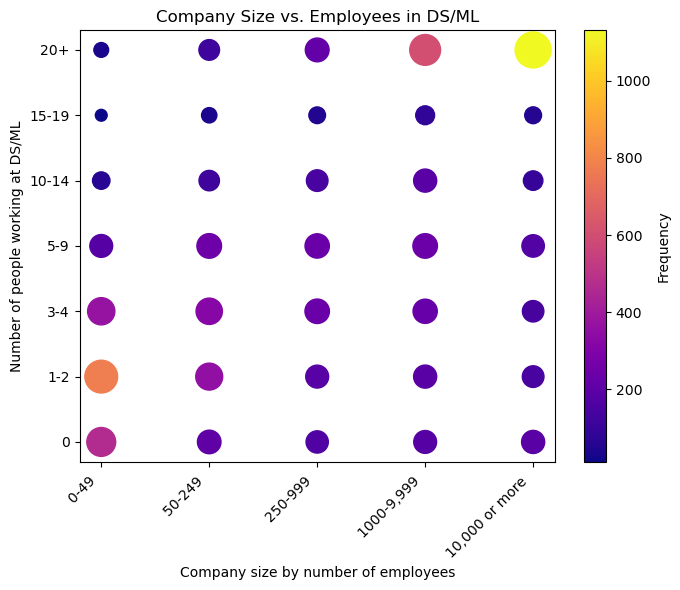

In [29]:
# Reemplazar el string 'employees' en la columna Q25
df['Q25'] = df['Q25'].str.replace('employees', '')

# Agrupar y contar la frecuencia de combinaciones de Q25 y Q26
counts = df.groupby(['Q25', 'Q26']).size()

# Obtener los valores únicos de Q25 y Q26
q25_values = df['Q25'].unique()
q26_values = df['Q26'].unique()

# Obtener los valores únicos de Q25 y Q26 en el orden deseado
q25_order = ['0-49 ', '50-249 ', '250-999 ', '1000-9,999 ', '10,000 or more ']
q26_order = ['0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+']

# Función reindex de pandas para reordenar los valores de las columnas
counts = counts.reindex(pd.MultiIndex.from_product([q25_order, q26_order], names=['Q25', 'Q26']), fill_value=0)

# Crear las coordenadas para el gráfico de dispersión
x_coords = [q25_order.index(q25) for q25 in counts.index.get_level_values('Q25')]
y_coords = [q26_order.index(q26) for q26 in counts.index.get_level_values('Q26')]

# Calcular el tamaño de los puntos en función de la frecuencia
sizes = np.sqrt(counts.values)*20

# Crear el gráfico de dispersión con área
fig, ax = plt.subplots(figsize=(7, 6)) 
scatter = ax.scatter(x_coords, y_coords, s=sizes, c=counts.values, cmap='plasma')

# Personalizar el gráfico
ax.set_xticks(range(len(q25_order)))
ax.set_xticklabels(q25_order, rotation=45, ha='right')
ax.set_yticks(range(len(q26_order)))
ax.set_yticklabels(q26_order)
ax.set_xlabel('Company size by number of employees')
ax.set_ylabel('Number of people working at DS/ML')
ax.set_title('Company Size vs. Employees in DS/ML')

# Añadir una barra de color
cbar = fig.colorbar(scatter)
cbar.set_label('Frequency')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [30]:
#df['Q29'].isna().sum()

# Filtrar los valores no nulos (no NaN)
filtered_df = df[df['Q29'].notna()]

# Convertir la columna 'Q29' a tipo float
filtered_df['Q29'] = filtered_df['Q29'].astype(str)
#print(filtered_df['Q29'])

filtered_df['Q29'] = filtered_df['Q29'].str.replace('$', '')
filtered_df['Q29'].unique()

C:\Users\usuario\AppData\Local\Temp\ipykernel_7412\1853058326.py:10: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



array(['nan', '25,000-29,999', '100,000-124,999', '200,000-249,999',
       '150,000-199,999', '90,000-99,999', '30,000-39,999', '3,000-3,999',
       '50,000-59,999', '125,000-149,999', '15,000-19,999', '5,000-7,499',
       '10,000-14,999', '20,000-24,999', '0-999', '7,500-9,999',
       '4,000-4,999', '2,000-2,999', '80,000-89,999', '250,000-299,999',
       '500,000-999,999', '70,000-79,999', '1,000-1,999', '60,000-69,999',
       '40,000-49,999', '>1,000,000', '300,000-499,999'], dtype=object)

### Gain and distribution of people dedicated to DS/ML

Gains in the field of Data Science/Machine Learning globally have experienced significant growth in recent years. As technology advances and expands, and organizations recognize the value of data and machine learning in their operations, there has been an increasing demand for skilled professionals in these areas.

According to reports and studies, the global Data Science market is estimated to reach a value of several billion dollars in the coming years. For example, a report from Grand View Research projects that the Big Data and Analytics market will reach 512.04 billion dollars by 2026. Furthermore, the Machine Learning market is expected to reach 96.7 billion dollars by 2025, according to [Markets and Markets](https://www.marketsandmarkets.com/Market-Reports/machine-learning-market-12688846.html) report.

That is why it is important in the analysis of the industry to see these gains by job role. We must make a parenthesis stating that the majority of resulting earnings are from 0 to 1,999 dollars, which could be due to the large number of unemployed professionals or a misunderstanding in the question since very low annual earnings result.

As a result, two specific profiles must be analyzed:
- Data Scientist, whose largest earnings distribution is in the ranges from 10,000 - 14,999 to 150,000 - 199,999 dollars per year, with high incomes for the average population of most countries.
- Data Analyst whose largest distribution of earnings is between the ranges of 5,000 - 7,499 up to 15,000 - 19,999 dollars per year, which represent significant earnings in underdeveloped countries.


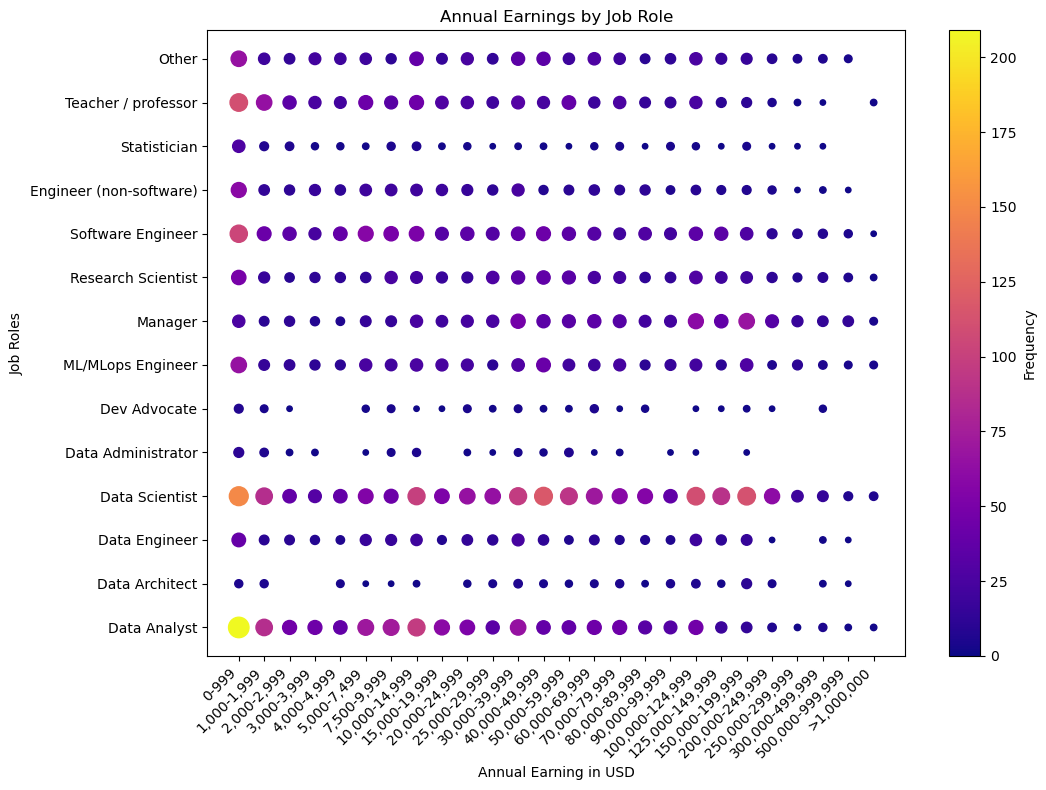

In [31]:
counts = filtered_df.groupby(['Q29', 'Q23']).size()

# Obtener los valores únicos de Q29 y Q23
q23_values = filtered_df['Q23'].unique()
q29_values = filtered_df['Q29'].unique()

# Obtener los valores únicos de Q29 y Q23 en el orden deseado
q29_order = ['0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999',
             '10,000-14,999', '15,000-19,999', '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999',
             '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999', '90,000-99,999', '100,000-124,999',
             '125,000-149,999', '150,000-199,999', '200,000-249,999', '250,000-299,999', '300,000-499,999',
             '500,000-999,999', '>1,000,000']  # Personaliza el orden según tus valores únicos
q23_order = ['Data Analyst', 'Data Architect', 'Data Engineer', 'Data Scientist', 'Data Administrator',
             'Dev Advocate', 'ML/MLops Engineer', 'Manager', 'Research Scientist',
             'Software Engineer', 'Engineer (non-software)', 'Statistician', 'Teacher / professor', 'Other']  # Personaliza el orden según tus valores únicos

# Función reindex de pandas para reordenar los valores de las columnas
counts = counts.reindex(pd.MultiIndex.from_product([q29_order, q23_order], names=['Q29', 'Q23']), fill_value=0)

# Crear las coordenadas para el gráfico de dispersión
x_coords = [q29_order.index(q29) for q29 in counts.index.get_level_values('Q29')]
y_coords = [q23_order.index(q23) for q23 in counts.index.get_level_values('Q23')]

# Calcular el tamaño de los puntos en función de la frecuencia
sizes = np.sqrt(counts.values) * 15

# Crear el gráfico de dispersión con área y barra de color
fig, ax = plt.subplots(figsize=(11, 8))
scatter = ax.scatter(x_coords, y_coords, s=sizes, c=counts.values, cmap='plasma')

# Personalizar el gráfico
ax.set_xticks(range(len(q29_order)))
ax.set_xticklabels(q29_order, rotation=45, ha='right')
ax.set_yticks(range(len(q23_order)))
ax.set_yticklabels(q23_order)
ax.set_xlabel('Annual Earning in USD')
ax.set_ylabel('Job Roles')
ax.set_title('Annual Earnings by Job Role')

# Añadir una barra de color
cbar = fig.colorbar(scatter)
cbar.set_label('Frequency')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [32]:
df['Q29'] = df['Q29'].replace({'$': ''})
df['Q29B'] = df['Q29'].replace({'$0-999':'1000', '0-999':'1000', '1,000-1,999':'2000', '2,000-2,999':'3000', '3,000-3,999':'4000', '4,000-4,999':'5000', '5,000-7,499':'7500'
                                , '7,500-9,999': '8750', '10,000-14,999': '12500', '15,000-19,999':'17500', '20,000-24,999':'22500'
                                , '25,000-29,999':'27500', '30,000-39,999':'35000', '40,000-49,999':'45000', '50,000-59,999':'55000'
                                , '60,000-69,999':'65000', '70,000-79,999':'75000', '80,000-89,999':'85000', '90,000-99,999':'95000'
                                , '100,000-124,999':'112500', '125,000-149,999':'137500', '150,000-199,999':'175000'
                                , '200,000-249,999':'225000', '250,000-299,999':'275000', '300,000-499,999':'400000'
                                , '500,000-999,999':'750000', '$500,000-999,999':'750000', '>1,000,000':'1000000', '>$1,000,000':'1000000'})

df['Q29B'] = df['Q29B'].astype(float)

### Approximate Industry Profit

In the previous section we saw the importance of analyzing earnings in order to know more about the development of the industry in this work area, however the previous graph is skewed due to the large number of respondents who work in specific areas of Data Scientist and Data Analyst (as shown in the pie chart), because of this, it was proposed to work on a chart that shows the average earnings of each job role in each industry sector. This amount of profit is approximate since there was no option to put the exact annual profit and instead it was decided to put multiple ranges of profits.
The most important aspects are the following:

- Engineering (non-software) in the Insurance/Risk Assessment industry has the highest earnings on average with 400,000 dollars per year. In second place are Research Scientists in the Finance industry with an average earnings of approximately 290,000 per year. In third place are Data Architects in the Insurance/Risk Assessment industry with an approximate average earnings of 270,000 per year.

- We can note that there are sectors that stand out for their juicy profits, which are headed by the Insurance/Risk Assessment industry, followed by the Finance sector, the Marketing sector and the Broadcasting/Communication sector. But as we saw in the previous point, it depends a lot on the job role chosen to excel economically.

Insurance companies and underwriting institutions rely heavily on data analysis to make informed decisions. They use Machine Learning algorithms and models to assess risk, set insurance premiums, detect fraud, and predict future claims. These decisions can have a significant impact on the profitability and financial stability of companies, which justifies investment in talent in this field.



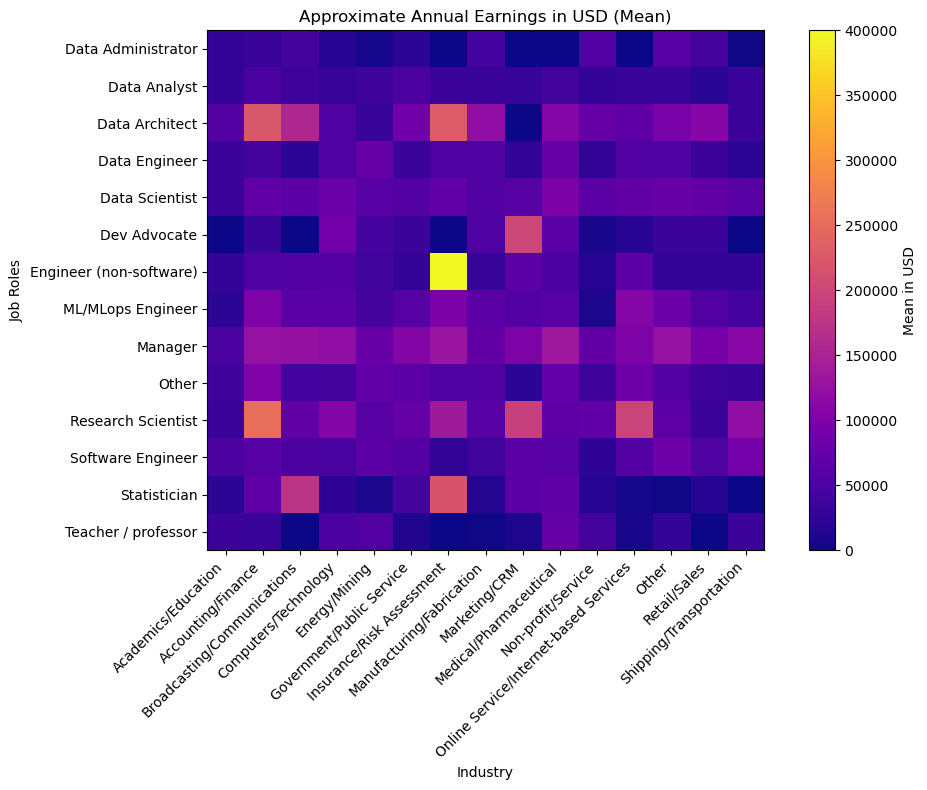

In [33]:
# Filtrar los valores no deseados en 'Q29B'
filtered3_df = df[~df['Q29B'].isin(['1000', '2000', '3000', '5000', '7500'])]
# Convertir la columna 'Q29B' a tipo numérico y filtrar los valores no numéricos
df['Q29B'] = pd.to_numeric(df['Q29B'], errors='coerce')

# Eliminar filas con valores NaN en 'Q29B'
filtered3_df = df.dropna(subset=['Q29B'])

# Calcular la suma de Q29B por combinación única de Q24 y Q23
sum_q29b = filtered3_df.groupby(['Q24', 'Q23'])['Q29B'].mean()

# Obtener los valores únicos de Q24 y Q23
q24_values = np.unique(filtered3_df['Q24'])
q23_values = np.unique(filtered3_df['Q23'])

# Crear una matriz de tamaño (n_q23, n_q24) para almacenar los valores de suma de Q29B
heatmap_data = np.zeros((len(q23_values), len(q24_values)))

# Rellenar la matriz de datos del heatmap con las sumas de Q29B
for i, q23 in enumerate(q23_values):
    for j, q24 in enumerate(q24_values):
        heatmap_data[i, j] = sum_q29b.get((q24, q23), 0)

# Crear el heatmap
fig, ax = plt.subplots(figsize=(11, 8))
heatmap = ax.imshow(heatmap_data, cmap='plasma')

# Personalizar el gráfico
ax.set_xticks(np.arange(len(q24_values)))
ax.set_xticklabels(q24_values, rotation=45, ha='right')
ax.set_yticks(np.arange(len(q23_values)))
ax.set_yticklabels(q23_values)
ax.set_xlabel('Industry')
ax.set_ylabel('Job Roles')
ax.set_title('Approximate Annual Earnings in USD (Mean)')

# Añadir una barra de color
cbar = fig.colorbar(heatmap)
cbar.set_label('Mean in USD')

# Mostrar el gráfico
plt.tight_layout()
plt.show()



In [34]:
# Reemplazar los valores 'nan' y 'Other' con NaN (valores nulos)
df['Q23'].replace(['nan', 'Other', 'Currently not employed'], pd.NA, inplace=True)

# Eliminar las filas que contienen NaN en la columna 'Q23'
df.dropna(subset=['Q23'], inplace=True)

### Analysis of Tools and Technologies used in Data Science and Machine Learning

In the field of Data Science and Machine Learning, there are various tools and technologies that play a crucial role in the development and application of models. These tools enable data professionals and machine learning scientists to leverage data effectively and build accurate and efficient models. Below, I will describe some of these tools and their relevance in the field:

One fundamental aspect is the use of programming languages such as Python, R, or Java. These languages provide a solid foundation for algorithm development and data processing in Data Science and Machine Learning. Additionally, integrated development environments (IDEs) offer a complete environment for writing and executing code, facilitating the development and experimentation process.

Currently, hosted notebook products also play an important role. These online platforms, such as Jupyter Notebooks or Google Colab, allow professionals to collaborate and execute code in interactive notebook-based environments. This facilitates collaboration and sharing of results in Data Science and Machine Learning projects.

Furthermore, data visualization libraries such as Matplotlib, Seaborn, or Plotly are essential for creating graphical visualizations that aid in exploring and effectively communicating data. These tools enable the identification of patterns, trends, and relationships, which are essential for data analysis and informed decision-making.

Machine learning frameworks, such as TensorFlow, PyTorch, or scikit-learn, provide tools and libraries for building, training, and evaluating machine learning models. These frameworks offer a unified interface and specialized functionalities for implementing machine learning algorithms such as neural networks, decision trees, or clustering algorithms.

In the field of computer vision, image and video processing methods play a fundamental role. These methods enable object detection, facial recognition, image segmentation, and many other applications. Common techniques in this field include the use of convolutional neural networks (CNNs) and feature extraction algorithms.

On the other hand, natural language processing (NLP) focuses on the analysis and processing of text and human language. This includes tasks such as sentiment classification, sentiment analysis, text generation, and machine translation. Techniques used in NLP include text processing, language models, and text classification algorithms.

In addition to these tools, there are others that play an important role in the Data Science and Machine Learning workflow. These include the use of pre-trained models, which capture pre-learned knowledge and features, and can be used as a starting point for related machine learning tasks. Cloud computing platforms, such as Amazon Web Services (AWS), Google Cloud Platform (GCP), or Microsoft Azure, provide scalable computational resources and storage services for executing Data Science and Machine Learning tasks. Data storage products, such as relational databases, data warehouses, or data lakes, are crucial for storing and managing large volumes of data efficiently. Business intelligence tools, like Tableau, Power BI, or Qlik, offer interactive visualization and data analysis capabilities at an enterprise level. Managed machine learning products, such as Amazon SageMaker, Google Cloud AI Platform, or Microsoft Azure Machine Learning, streamline the development, training, and deployment of machine learning models. Automated machine learning tools, such as Google's AutoML or H2O.ai, aim to simplify the process of building and training machine learning models by automating tasks such as feature selection, hyperparameter tuning, and model generation. Products for serving machine learning models enable the deployment of models in production environments and real-time prediction serving. Tools for monitoring machine learning models allow for the monitoring and evaluation of the performance of deployed machine learning models, including metrics tracking, anomaly detection, and corrective actions when necessary. Lastly, specialized hardware for training machine learning models, such as graphics processing units (GPUs) or tensor processing units (TPUs), are optimized for the computational requirements of training complex models.

These tools and technologies collectively provide a comprehensive toolkit for data professionals and machine learning scientists to tackle a wide range of problems in the field. By leveraging programming languages, integrated development environments, hosted notebook products, data visualization libraries, machine learning frameworks, algorithms, computer vision methods, natural language processing techniques, pre-trained model weights, cloud computing platforms, data storage products, business intelligence tools, managed machine learning products, automated machine learning tools, products for serving machine learning models, monitoring tools, and specialized hardware, practitioners can effectively explore, analyze, model, and deploy machine learning solutions. The continued advancement and integration of these tools contribute to the growth and innovation in the field of Data Science and Machine Learning.

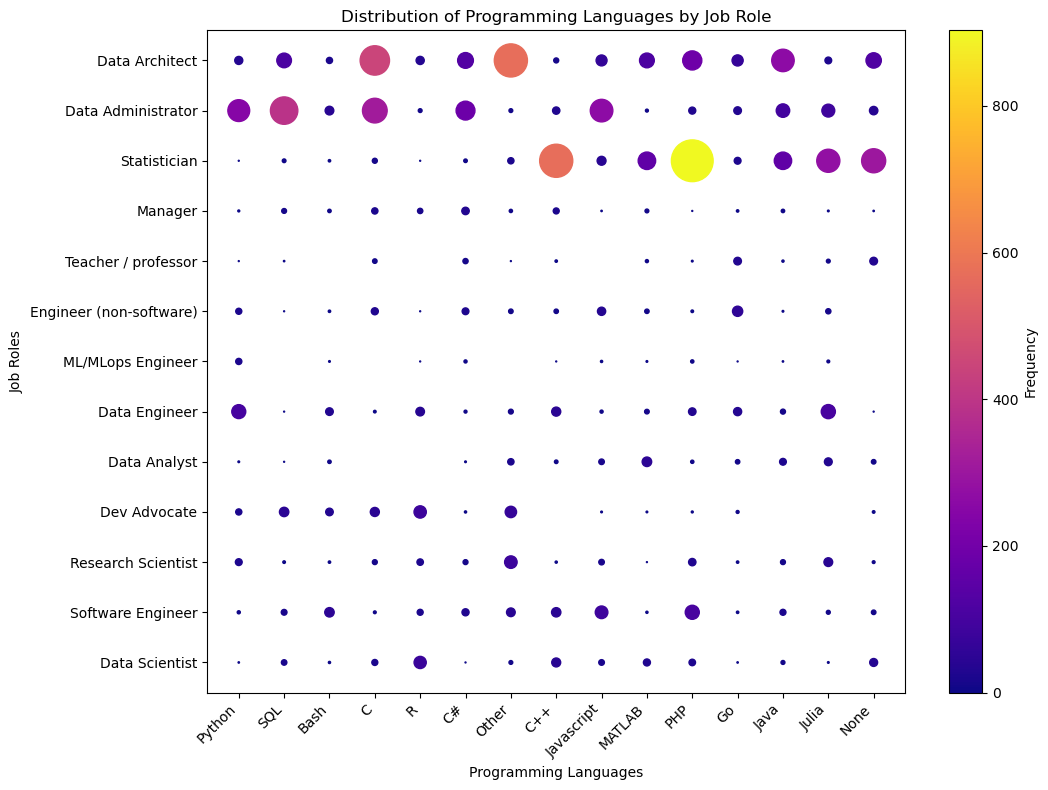

In [35]:
# Descomponer la columna 'Q12' en registros separados
df['Q12_split'] = df['Q12'].str.split('=')

# Crear un nuevo DataFrame con registros duplicados
df_Q12 = df.explode('Q12_split')

# Eliminar la columna 'Q12' original
df_Q12.drop(columns=['Q12'], inplace=True)

# Renombrar la columna 'Q12_split' como 'Q12'
df_Q12.rename(columns={'Q12_split': 'Q12'}, inplace=True)

# Seleccionar las columnas 'Q12' y 'Q23' del DataFrame original
df_subset = df[['Q12', 'Q23']].copy()

# Remover las filas con valores nulos en las columnas seleccionadas
df_subset.dropna(subset=['Q12', 'Q23'], inplace=True)

# Dividir los valores en la columna 'Q12'
df_subset['Q12_split'] = df_subset['Q12'].str.split('=')

# Expandir los valores divididos en varias filas
df_unstack = df_subset.explode('Q12_split')

# Contar la frecuencia de las combinaciones de 'Q12_split' y 'Q23'
counts = df_unstack.groupby(['Q12_split', 'Q23']).size().unstack(fill_value=0)

# Obtener los valores únicos de 'Q12' y 'Q23'
q12_values = df_unstack['Q12_split'].unique()
q23_values = df_unstack['Q23'].unique()

# Crear las coordenadas para el gráfico de dispersión
x_coords = np.arange(len(q12_values))
y_coords = np.arange(len(q23_values))

# Crear una rejilla de coordenadas
X, Y = np.meshgrid(x_coords, y_coords)

# Aplanar los valores de frecuencia
Z = counts.values/2

# Crear el gráfico de dispersión con área y barra de color
fig, ax = plt.subplots(figsize=(11, 8))
scatter = ax.scatter(X, Y, s=Z, c=Z, cmap='plasma')

# Personalizar el gráfico
ax.set_xticks(x_coords)
ax.set_xticklabels(q12_values, rotation=45, ha='right')
ax.set_yticks(y_coords)
ax.set_yticklabels(q23_values)
ax.set_xlabel('Programming Languages')
ax.set_ylabel('Job Roles')
ax.set_title('Distribution of Programming Languages by Job Role')

# Añadir una barra de color
cbar = fig.colorbar(scatter)
cbar.set_label('Frequency')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


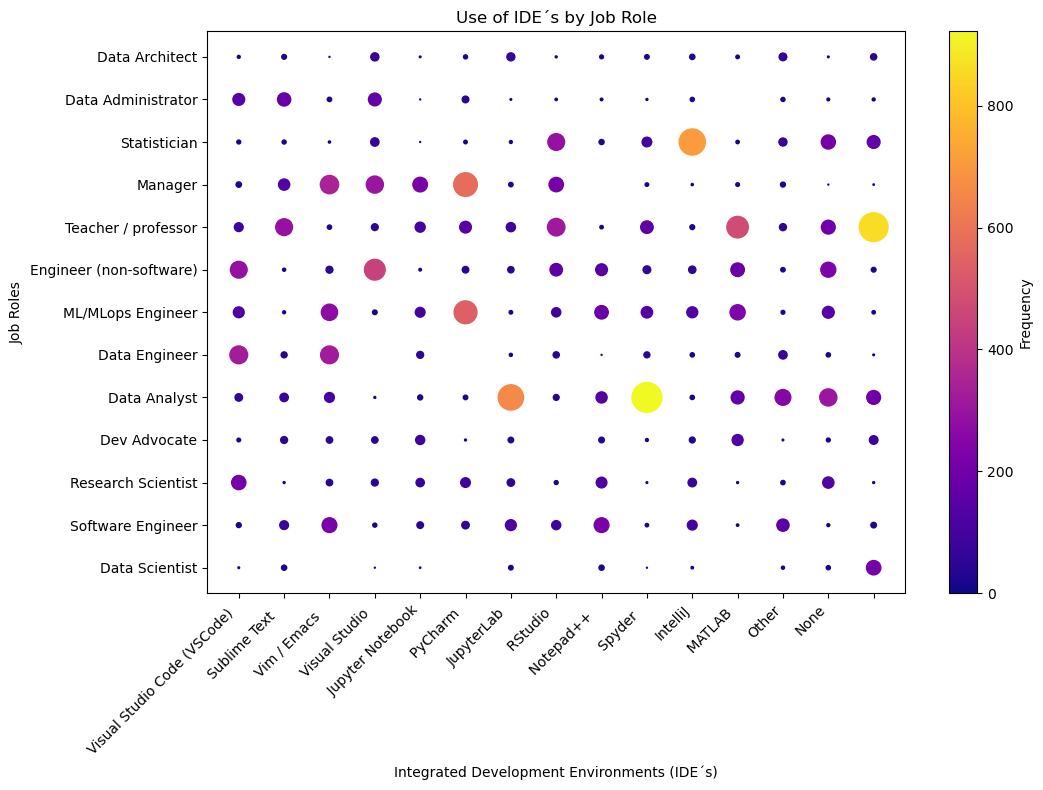

In [36]:
df['Q13'].fillna('N/A', inplace=True)
df.dropna(subset=['Q13'], inplace=True)

# Descomponer la columna 'Q12' en registros separados
df['Q13_split'] = df['Q13'].str.split('=')

# Crear un nuevo DataFrame con registros duplicados
df_Q13 = df.explode('Q13_split')

# Eliminar la columna 'Q13' original
df_Q13.drop(columns=['Q13'], inplace=True)

# Renombrar la columna 'Q13_split' como 'Q13'
df_Q13.rename(columns={'Q13_split': 'Q13'}, inplace=True)

df_Q13= df.loc[df['Q13'] != '']

# Seleccionar las columnas 'Q12' y 'Q23' del DataFrame original
df_subset = df[['Q13', 'Q23']].copy()

# Remover las filas con valores nulos en las columnas seleccionadas
df_subset.dropna(subset=['Q13', 'Q23'], inplace=True)

# Dividir los valores en la columna 'Q12'
df_subset['Q13_split'] = df_subset['Q13'].str.split('=')

# Expandir los valores divididos en varias filas
df_unstack = df_subset.explode('Q13_split')

# Contar la frecuencia de las combinaciones de 'Q13_split' y 'Q23'
counts = df_unstack.groupby(['Q13_split', 'Q23']).size().unstack(fill_value=0)

# Obtener los valores únicos de 'Q13' y 'Q23'
q13_values = df_unstack['Q13_split'].unique()
q23_values = df_unstack['Q23'].unique()

# Crear las coordenadas para el gráfico de dispersión
x_coords = np.arange(len(q13_values))
y_coords = np.arange(len(q23_values))

# Crear una rejilla de coordenadas
X, Y = np.meshgrid(x_coords, y_coords)

# Aplanar los valores de frecuencia
Z = counts.values.flatten()

# Crear el gráfico de dispersión con área y barra de color
fig, ax = plt.subplots(figsize=(11, 8))
scatter = ax.scatter(X, Y, s=Z/2, c=Z, cmap='plasma')

# Personalizar el gráfico
ax.set_xticks(x_coords)
ax.set_xticklabels(q13_values, rotation=45, ha='right')
ax.set_yticks(y_coords)
ax.set_yticklabels(q23_values)
ax.set_xlabel('Integrated Development Environments (IDE´s)')
ax.set_ylabel('Job Roles')
ax.set_title('Use of IDE´s by Job Role')

# Añadir una barra de color
cbar = fig.colorbar(scatter)
cbar.set_label('Frequency')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

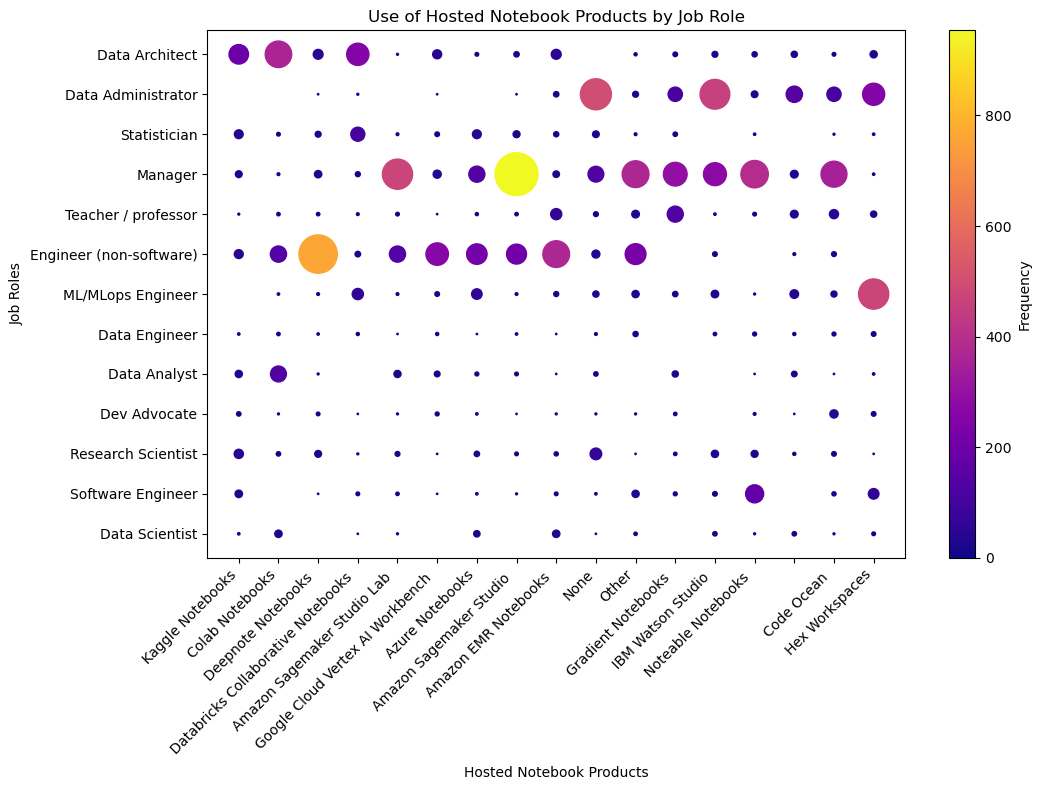

In [37]:
df['Q14'].fillna('N/A', inplace=True)
df.dropna(subset=['Q14'], inplace=True)

# Descomponer la columna 'Q14' en registros separados
df['Q14_split'] = df['Q14'].str.split('=')

# Crear un nuevo DataFrame con registros duplicados
df_Q14 = df.explode('Q14_split')

# Eliminar la columna 'Q14' original
df_Q14.drop(columns=['Q14'], inplace=True)

# Renombrar la columna 'Q14_split' como 'Q14'
df_Q14.rename(columns={'Q14_split': 'Q14'}, inplace=True)

# Seleccionar las columnas 'Q14' y 'Q23' del DataFrame original
df_subset = df[['Q14', 'Q23']].copy()

# Remover las filas con valores nulos en las columnas seleccionadas
df_subset.dropna(subset=['Q14', 'Q23'], inplace=True)

# Dividir los valores en la columna 'Q14'
df_subset['Q14_split'] = df_subset['Q14'].str.split('=')

# Expandir los valores divididos en varias filas
df_unstack = df_subset.explode('Q14_split')

# Contar la frecuencia de las combinaciones de 'Q14_split' y 'Q23'
counts = df_unstack.groupby(['Q14_split', 'Q23']).size().unstack(fill_value=0)

# Obtener los valores únicos de 'Q14' y 'Q23'
Q14_values = df_unstack['Q14_split'].unique()
q23_values = df_unstack['Q23'].unique()

# Crear las coordenadas para el gráfico de dispersión
x_coords = np.arange(len(Q14_values))
y_coords = np.arange(len(q23_values))

# Crear una rejilla de coordenadas
X, Y = np.meshgrid(x_coords, y_coords)

# Aplanar los valores de frecuencia
Z = counts.values.flatten()

# Crear el gráfico de dispersión con área y barra de color
fig, ax = plt.subplots(figsize=(11, 8))
scatter = ax.scatter(X, Y, s=Z, c=Z, cmap='plasma')

# Personalizar el gráfico
ax.set_xticks(x_coords)
ax.set_xticklabels(Q14_values, rotation=45, ha='right')
ax.set_yticks(y_coords)
ax.set_yticklabels(q23_values)
ax.set_xlabel('Hosted Notebook Products')
ax.set_ylabel('Job Roles')
ax.set_title('Use of Hosted Notebook Products by Job Role')

# Añadir una barra de color
cbar = fig.colorbar(scatter)
cbar.set_label('Frequency')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

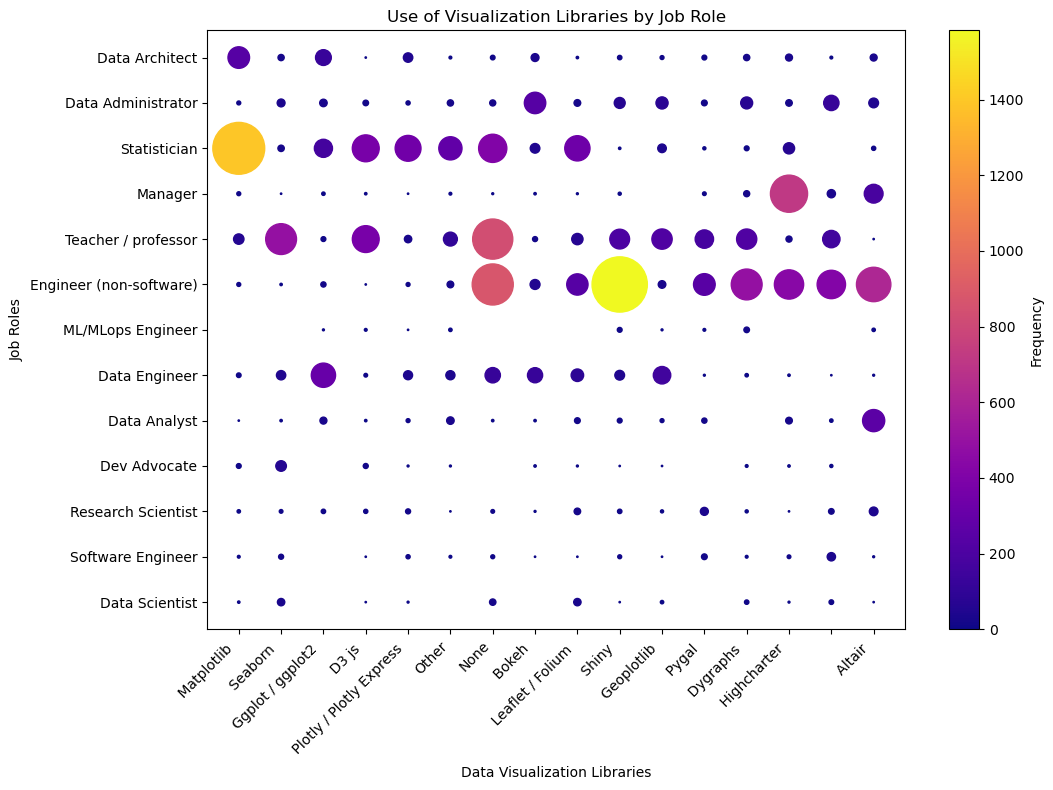

In [38]:
df['Q15'].fillna('N/A', inplace=True)
df.dropna(subset=['Q15'], inplace=True)

# Descomponer la columna 'Q15' en registros separados
df['Q15_split'] = df['Q15'].str.split('=')

# Crear un nuevo DataFrame con registros duplicados
df_Q15 = df.explode('Q15_split')

# Eliminar la columna 'Q15' original
df_Q15.drop(columns=['Q15'], inplace=True)

# Renombrar la columna 'Q15_split' como 'Q15'
df_Q15.rename(columns={'Q15_split': 'Q15'}, inplace=True)

# Seleccionar las columnas 'Q15' y 'Q23' del DataFrame original
df_subset = df[['Q15', 'Q23']].copy()

# Remover las filas con valores nulos en las columnas seleccionadas
df_subset.dropna(subset=['Q15', 'Q23'], inplace=True)

# Dividir los valores en la columna 'Q15'
df_subset['Q15_split'] = df_subset['Q15'].str.split('=')

# Expandir los valores divididos en varias filas
df_unstack = df_subset.explode('Q15_split')

# Contar la frecuencia de las combinaciones de 'Q15_split' y 'Q23'
counts = df_unstack.groupby(['Q15_split', 'Q23']).size().unstack(fill_value=0)

# Obtener los valores únicos de 'Q15' y 'Q23'
Q15_values = df_unstack['Q15_split'].unique()
q23_values = df_unstack['Q23'].unique()

# Crear las coordenadas para el gráfico de dispersión
x_coords = np.arange(len(Q15_values))
y_coords = np.arange(len(q23_values))

# Crear una rejilla de coordenadas
X, Y = np.meshgrid(x_coords, y_coords)

# Aplanar los valores de frecuencia
Z = counts.values.flatten()

# Crear el gráfico de dispersión con área y barra de color
fig, ax = plt.subplots(figsize=(11, 8))
scatter = ax.scatter(X, Y, s=Z, c=Z, cmap='plasma')

# Personalizar el gráfico
ax.set_xticks(x_coords)
ax.set_xticklabels(Q15_values, rotation=45, ha='right')
ax.set_yticks(y_coords)
ax.set_yticklabels(q23_values)
ax.set_xlabel('Data Visualization Libraries')
ax.set_ylabel('Job Roles')
ax.set_title('Use of Visualization Libraries by Job Role')

# Añadir una barra de color
cbar = fig.colorbar(scatter)
cbar.set_label('Frequency')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

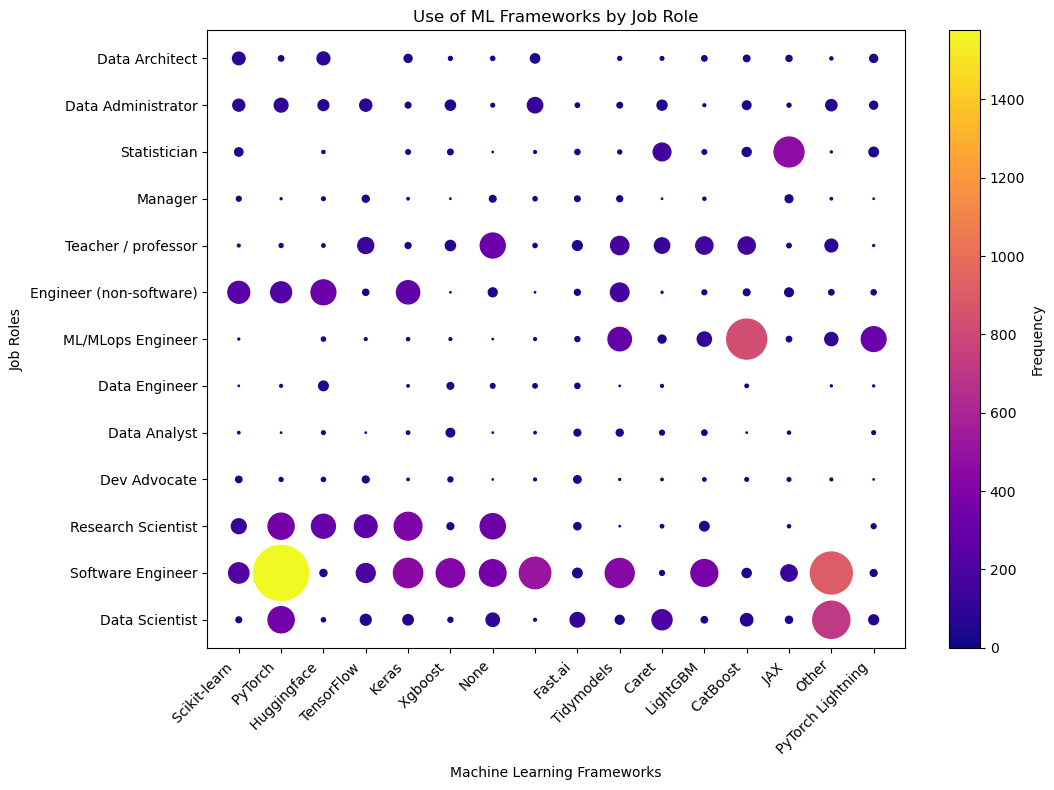

In [39]:
df['Q17'].fillna('N/A', inplace=True)
df.dropna(subset=['Q17'], inplace=True)

# Descomponer la columna 'Q17' en registros separados
df['Q17_split'] = df['Q17'].str.split('=')

# Crear un nuevo DataFrame con registros duplicados
df_Q17 = df.explode('Q17_split')

# Eliminar la columna 'Q17' original
df_Q17.drop(columns=['Q17'], inplace=True)

# Renombrar la columna 'Q17_split' como 'Q17'
df_Q17.rename(columns={'Q17_split': 'Q17'}, inplace=True)

# Seleccionar las columnas 'Q17' y 'Q23' del DataFrame original
df_subset = df[['Q17', 'Q23']].copy()

# Remover las filas con valores nulos en las columnas seleccionadas
df_subset.dropna(subset=['Q17', 'Q23'], inplace=True)

# Dividir los valores en la columna 'Q17'
df_subset['Q17_split'] = df_subset['Q17'].str.split('=')

# Expandir los valores divididos en varias filas
df_unstack = df_subset.explode('Q17_split')

# Contar la frecuencia de las combinaciones de 'Q17_split' y 'Q23'
counts = df_unstack.groupby(['Q17_split', 'Q23']).size().unstack(fill_value=0)

# Obtener los valores únicos de 'Q17' y 'Q23'
Q17_values = df_unstack['Q17_split'].unique()
q23_values = df_unstack['Q23'].unique()

# Crear las coordenadas para el gráfico de dispersión
x_coords = np.arange(len(Q17_values))
y_coords = np.arange(len(q23_values))

# Crear una rejilla de coordenadas
X, Y = np.meshgrid(x_coords, y_coords)

# Aplanar los valores de frecuencia
Z = counts.values.flatten()

# Crear el gráfico de dispersión con área y barra de color
fig, ax = plt.subplots(figsize=(11, 8))
scatter = ax.scatter(X, Y, s=Z, c=Z, cmap='plasma')

# Personalizar el gráfico
ax.set_xticks(x_coords)
ax.set_xticklabels(Q17_values, rotation=45, ha='right')
ax.set_yticks(y_coords)
ax.set_yticklabels(q23_values)
ax.set_xlabel('Machine Learning Frameworks')
ax.set_ylabel('Job Roles')
ax.set_title('Use of ML Frameworks by Job Role')

# Añadir una barra de color
cbar = fig.colorbar(scatter)
cbar.set_label('Frequency')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

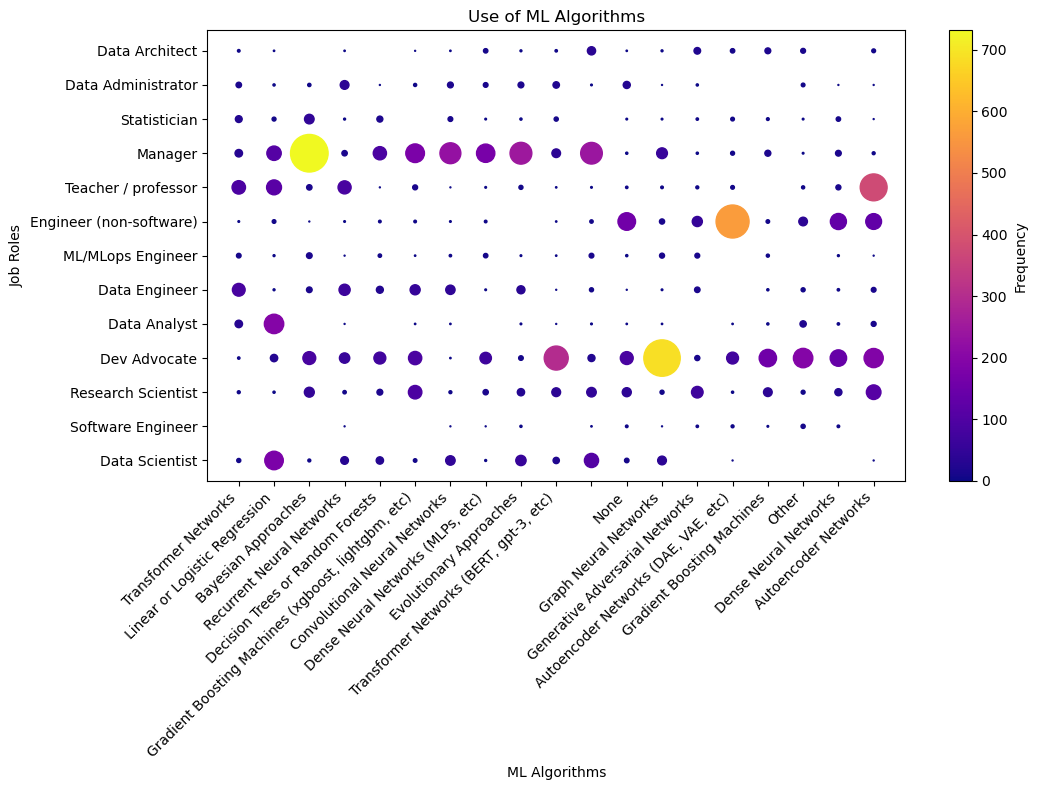

In [40]:
df['Q18'].fillna('N/A', inplace=True)
df.dropna(subset=['Q18'], inplace=True)

# Descomponer la columna 'Q18' en registros separados
df['Q18_split'] = df['Q18'].str.split('=')

# Crear un nuevo DataFrame con registros duplicados
df_Q18 = df.explode('Q18_split')

# Eliminar la columna 'Q18' original
df_Q18.drop(columns=['Q18'], inplace=True)

# Renombrar la columna 'Q18_split' como 'Q18'
df_Q18.rename(columns={'Q18_split': 'Q18'}, inplace=True)

# Seleccionar las columnas 'Q18' y 'Q23' del DataFrame original
df_subset = df[['Q18', 'Q23']].copy()

# Remover las filas con valores nulos en las columnas seleccionadas
df_subset.dropna(subset=['Q18', 'Q23'], inplace=True)

# Dividir los valores en la columna 'Q18'
df_subset['Q18_split'] = df_subset['Q18'].str.split('=')

# Expandir los valores divididos en varias filas
df_unstack = df_subset.explode('Q18_split')

# Contar la frecuencia de las combinaciones de 'Q18_split' y 'Q23'
counts = df_unstack.groupby(['Q18_split', 'Q23']).size().unstack(fill_value=0)

# Obtener los valores únicos de 'Q18' y 'Q23'
q18_values = df_unstack['Q18_split'].unique()
q23_values = df_unstack['Q23'].unique()

q18_order = ['Linear or Logistic Regression', 'Decision Trees or Random Forests', 'Gradient Boosting Machines',
             'Bayesian Approaches', 'Evolutionary Approaches', 'Dense Neural Networks', 'Convolutional Neural Networks',
            'Generative Adversarial Networks', 'Recurrent Neural Networks', 'Transformer Networks', 'Autoencoder Networks',
            'Graph Neural Networks', 'None', 'Other']

# Crear las coordenadas para el gráfico de dispersión
x_coords = np.arange(len(q18_values))
y_coords = np.arange(len(q23_values))

# Crear una rejilla de coordenadas
X, Y = np.meshgrid(x_coords, y_coords)

# Aplanar los valores de frecuencia
Z = counts.values.flatten()

# Crear el gráfico de dispersión con área y barra de color
fig, ax = plt.subplots(figsize=(11, 8))
scatter = ax.scatter(X, Y, s=Z/2, c=Z/2, cmap='plasma')

# Personalizar el gráfico
ax.set_xticks(x_coords)
ax.set_xticklabels(q18_values, rotation=45, ha='right')
ax.set_yticks(y_coords)
ax.set_yticklabels(q23_values)
ax.set_xlabel('ML Algorithms')
ax.set_ylabel('Job Roles')
ax.set_title('Use of ML Algorithms')

# Añadir una barra de color
cbar = fig.colorbar(scatter)
cbar.set_label('Frequency')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

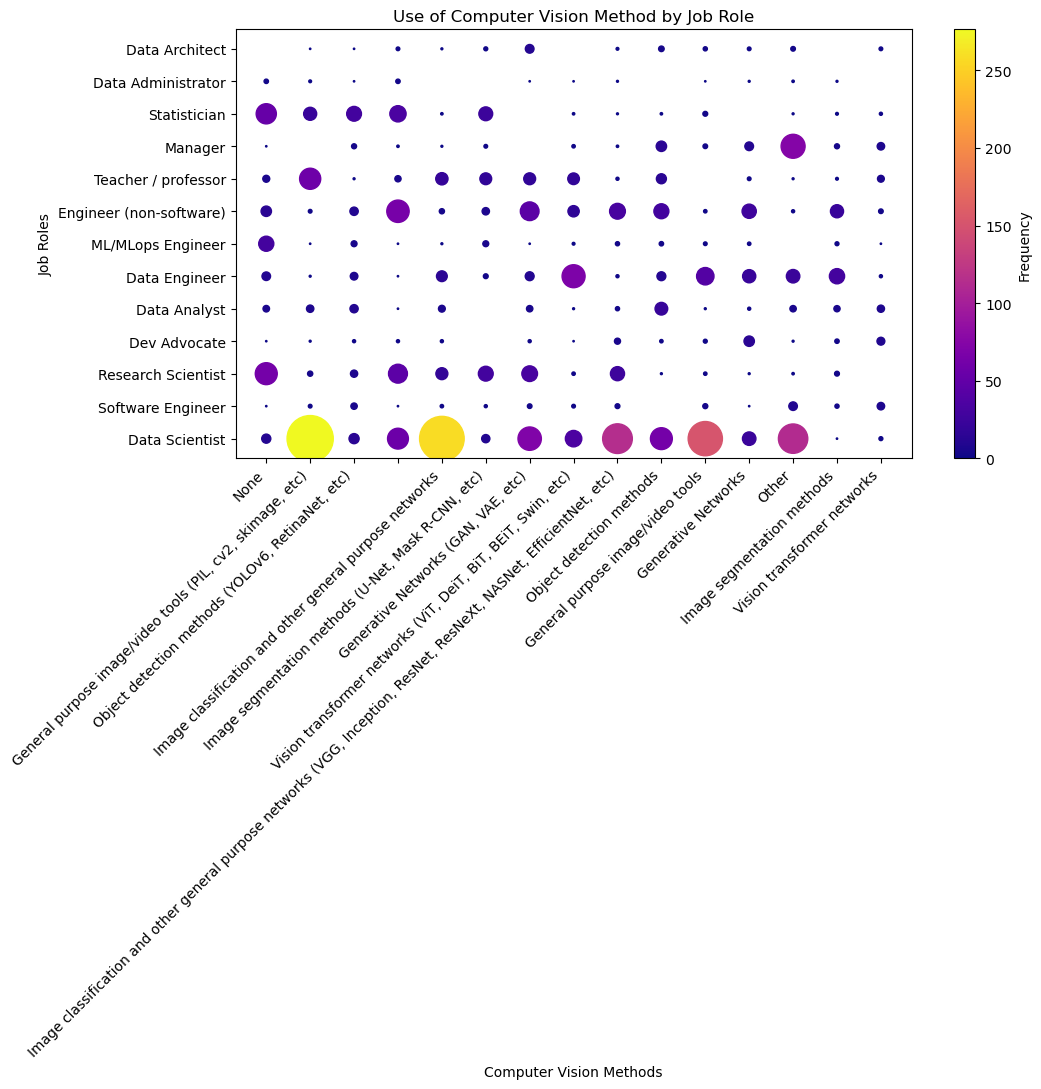

In [41]:
df['Q19'].fillna('N/A', inplace=True)
df.dropna(subset=['Q19'], inplace=True)

# Descomponer la columna 'Q19' en registros separados
df['Q19_split'] = df['Q19'].str.split('=')

# Crear un nuevo DataFrame con registros duplicados
df_Q19 = df.explode('Q19_split')

# Eliminar la columna 'Q19' original
df_Q19.drop(columns=['Q19'], inplace=True)

# Renombrar la columna 'Q19_split' como 'Q19'
df_Q19.rename(columns={'Q19_split': 'Q19'}, inplace=True)

# Seleccionar las columnas 'Q19' y 'Q23' del DataFrame original
df_subset = df[['Q19', 'Q23']].copy()

# Remover las filas con valores nulos en las columnas seleccionadas
df_subset.dropna(subset=['Q19', 'Q23'], inplace=True)

# Dividir los valores en la columna 'Q19'
df_subset['Q19_split'] = df_subset['Q19'].str.split('=')

# Expandir los valores divididos en varias filas
df_unstack = df_subset.explode('Q19_split')

# Contar la frecuencia de las combinaciones de 'Q19_split' y 'Q23'
counts = df_unstack.groupby(['Q19_split', 'Q23']).size().unstack(fill_value=0)

# Obtener los valores únicos de 'Q19' y 'Q23'
Q19_values = df_unstack['Q19_split'].unique()
q23_values = df_unstack['Q23'].unique()

# Crear las coordenadas para el gráfico de dispersión
x_coords = np.arange(len(Q19_values))
y_coords = np.arange(len(q23_values))

# Crear una rejilla de coordenadas
X, Y = np.meshgrid(x_coords, y_coords)

# Aplanar los valores de frecuencia
Z = counts.values.flatten()

# Crear el gráfico de dispersión con área y barra de color
fig, ax = plt.subplots(figsize=(11, 11))
scatter = ax.scatter(X, Y, s=Z, c=Z/4, cmap='plasma')

# Personalizar el gráfico
ax.set_xticks(x_coords)
ax.set_xticklabels(Q19_values, rotation=45, ha='right')
ax.set_yticks(y_coords)
ax.set_yticklabels(q23_values)
ax.set_xlabel('Computer Vision Methods')
ax.set_ylabel('Job Roles')
ax.set_title('Use of Computer Vision Method by Job Role')

# Añadir una barra de color
cbar = fig.colorbar(scatter)
cbar.set_label('Frequency')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

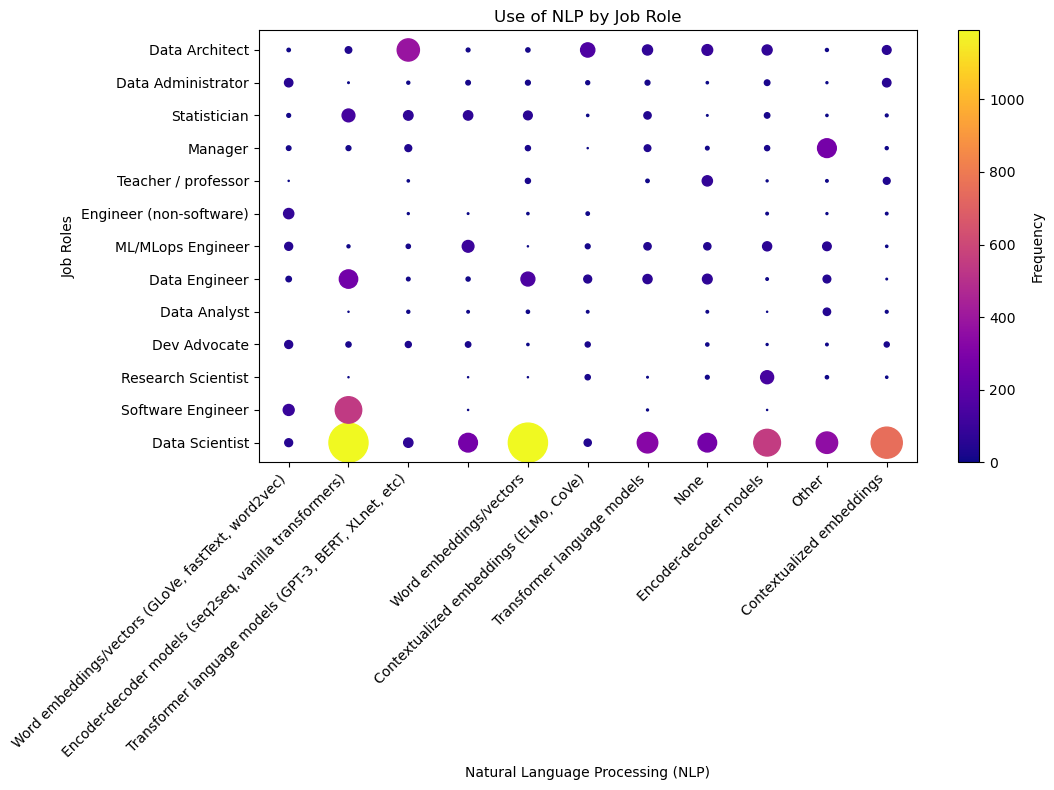

In [42]:
df['Q20'].fillna('N/A', inplace=True)
df.dropna(subset=['Q20'], inplace=True)

# Descomponer la columna 'Q20' en registros separados
df['Q20_split'] = df['Q20'].str.split('=')

# Crear un nuevo DataFrame con registros duplicados
df_Q20 = df.explode('Q20_split')

# Eliminar la columna 'Q20' original
df_Q20.drop(columns=['Q20'], inplace=True)

# Renombrar la columna 'Q20_split' como 'Q20'
df_Q20.rename(columns={'Q20_split': 'Q20'}, inplace=True)

# Seleccionar las columnas 'Q20' y 'Q23' del DataFrame original
df_subset = df[['Q20', 'Q23']].copy()

# Remover las filas con valores nulos en las columnas seleccionadas
df_subset.dropna(subset=['Q20', 'Q23'], inplace=True)

# Dividir los valores en la columna 'Q20'
df_subset['Q20_split'] = df_subset['Q20'].str.split('=')

# Expandir los valores divididos en varias filas
df_unstack = df_subset.explode('Q20_split')

# Contar la frecuencia de las combinaciones de 'Q20_split' y 'Q23'
counts = df_unstack.groupby(['Q20_split', 'Q23']).size().unstack(fill_value=0)

# Obtener los valores únicos de 'Q20' y 'Q23'
Q20_values = df_unstack['Q20_split'].unique()
q23_values = df_unstack['Q23'].unique()

# Crear las coordenadas para el gráfico de dispersión
x_coords = np.arange(len(Q20_values))
y_coords = np.arange(len(q23_values))

# Crear una rejilla de coordenadas
X, Y = np.meshgrid(x_coords, y_coords)

# Aplanar los valores de frecuencia
Z = counts.values.flatten()

# Crear el gráfico de dispersión con área y barra de color
fig, ax = plt.subplots(figsize=(11, 8))
scatter = ax.scatter(X, Y, s=Z/1.5, c=Z, cmap='plasma')

# Personalizar el gráfico
ax.set_xticks(x_coords)
ax.set_xticklabels(Q20_values, rotation=45, ha='right')
ax.set_yticks(y_coords)
ax.set_yticklabels(q23_values)
ax.set_xlabel('Natural Language Processing (NLP)')
ax.set_ylabel('Job Roles')
ax.set_title('Use of NLP by Job Role')

# Añadir una barra de color
cbar = fig.colorbar(scatter)
cbar.set_label('Frequency')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

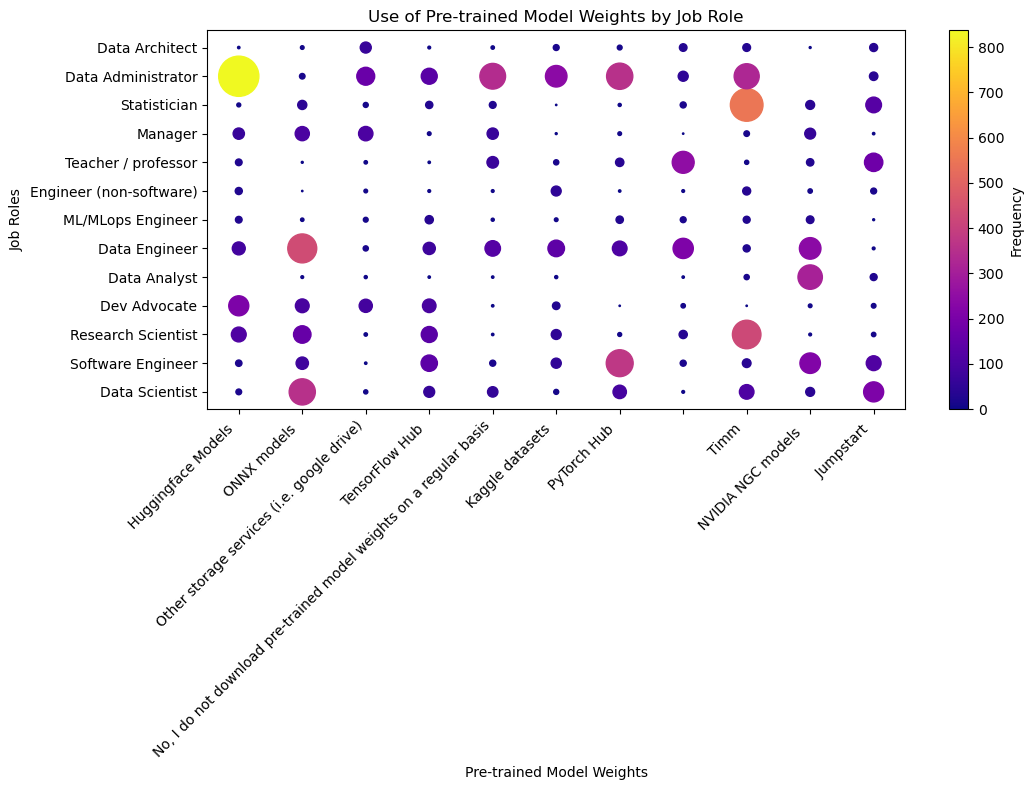

In [43]:
df['Q21'].fillna('N/A', inplace=True)
df.dropna(subset=['Q21'], inplace=True)

# Descomponer la columna 'Q21' en registros separados
df['Q21_split'] = df['Q21'].str.split('=')

# Crear un nuevo DataFrame con registros duplicados
df_Q21 = df.explode('Q21_split')

# Eliminar la columna 'Q21' original
df_Q21.drop(columns=['Q21'], inplace=True)

# Renombrar la columna 'Q21_split' como 'Q21'
df_Q21.rename(columns={'Q21_split': 'Q21'}, inplace=True)

# Seleccionar las columnas 'Q21' y 'Q23' del DataFrame original
df_subset = df[['Q21', 'Q23']].copy()

# Remover las filas con valores nulos en las columnas seleccionadas
df_subset.dropna(subset=['Q21', 'Q23'], inplace=True)

# Dividir los valores en la columna 'Q21'
df_subset['Q21_split'] = df_subset['Q21'].str.split('=')

# Expandir los valores divididos en varias filas
df_unstack = df_subset.explode('Q21_split')

# Contar la frecuencia de las combinaciones de 'Q21_split' y 'Q23'
counts = df_unstack.groupby(['Q21_split', 'Q23']).size().unstack(fill_value=0)

# Obtener los valores únicos de 'Q21' y 'Q23'
Q21_values = df_unstack['Q21_split'].unique()
q23_values = df_unstack['Q23'].unique()

# Crear las coordenadas para el gráfico de dispersión
x_coords = np.arange(len(Q21_values))
y_coords = np.arange(len(q23_values))

# Crear una rejilla de coordenadas
X, Y = np.meshgrid(x_coords, y_coords)

# Aplanar los valores de frecuencia
Z = counts.values.flatten()

# Crear el gráfico de dispersión con área y barra de color
fig, ax = plt.subplots(figsize=(11, 8))
scatter = ax.scatter(X, Y, s=Z, c=Z, cmap='plasma')

# Personalizar el gráfico
ax.set_xticks(x_coords)
ax.set_xticklabels(Q21_values, rotation=45, ha='right')
ax.set_yticks(y_coords)
ax.set_yticklabels(q23_values)
ax.set_xlabel('Pre-trained Model Weights')
ax.set_ylabel('Job Roles')
ax.set_title('Use of Pre-trained Model Weights by Job Role')

# Añadir una barra de color
cbar = fig.colorbar(scatter)
cbar.set_label('Frequency')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

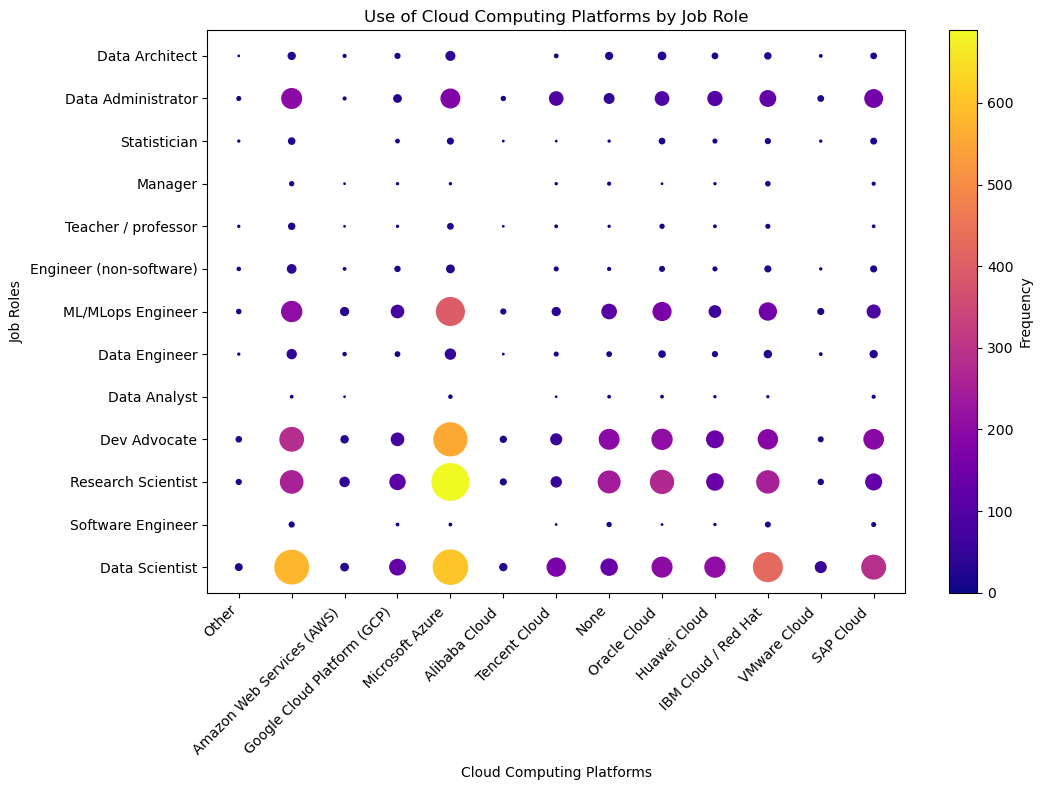

In [44]:
df['Q31'].fillna('N/A', inplace=True)
df.dropna(subset=['Q31'], inplace=True)

# Descomponer la columna 'Q31' en registros separados
df['Q31_split'] = df['Q31'].str.split('=')

# Crear un nuevo DataFrame con registros duplicados
df_Q31 = df.explode('Q31_split')

# Eliminar la columna 'Q31' original
df_Q31.drop(columns=['Q31'], inplace=True)

# Renombrar la columna 'Q31_split' como 'Q31'
df_Q31.rename(columns={'Q31_split': 'Q31'}, inplace=True)

# Seleccionar las columnas 'Q31' y 'Q23' del DataFrame original
df_subset = df[['Q31', 'Q23']].copy()

# Remover las filas con valores nulos en las columnas seleccionadas
df_subset.dropna(subset=['Q31', 'Q23'], inplace=True)

# Dividir los valores en la columna 'Q31'
df_subset['Q31_split'] = df_subset['Q31'].str.split('=')

# Expandir los valores divididos en varias filas
df_unstack = df_subset.explode('Q31_split')

# Contar la frecuencia de las combinaciones de 'Q31_split' y 'Q23'
counts = df_unstack.groupby(['Q31_split', 'Q23']).size().unstack(fill_value=0)

# Obtener los valores únicos de 'Q31' y 'Q23'
Q31_values = df_unstack['Q31_split'].unique()
q23_values = df_unstack['Q23'].unique()

# Crear las coordenadas para el gráfico de dispersión
x_coords = np.arange(len(Q31_values))
y_coords = np.arange(len(q23_values))

# Crear una rejilla de coordenadas
X, Y = np.meshgrid(x_coords, y_coords)

# Aplanar los valores de frecuencia
Z = counts.values.flatten()

# Crear el gráfico de dispersión con área y barra de color
fig, ax = plt.subplots(figsize=(11, 8))
scatter = ax.scatter(X, Y, s=Z, c=Z, cmap='plasma')

# Personalizar el gráfico
ax.set_xticks(x_coords)
ax.set_xticklabels(Q31_values, rotation=45, ha='right')
ax.set_yticks(y_coords)
ax.set_yticklabels(q23_values)
ax.set_xlabel('Cloud Computing Platforms')
ax.set_ylabel('Job Roles')
ax.set_title('Use of Cloud Computing Platforms by Job Role')

# Añadir una barra de color
cbar = fig.colorbar(scatter)
cbar.set_label('Frequency')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

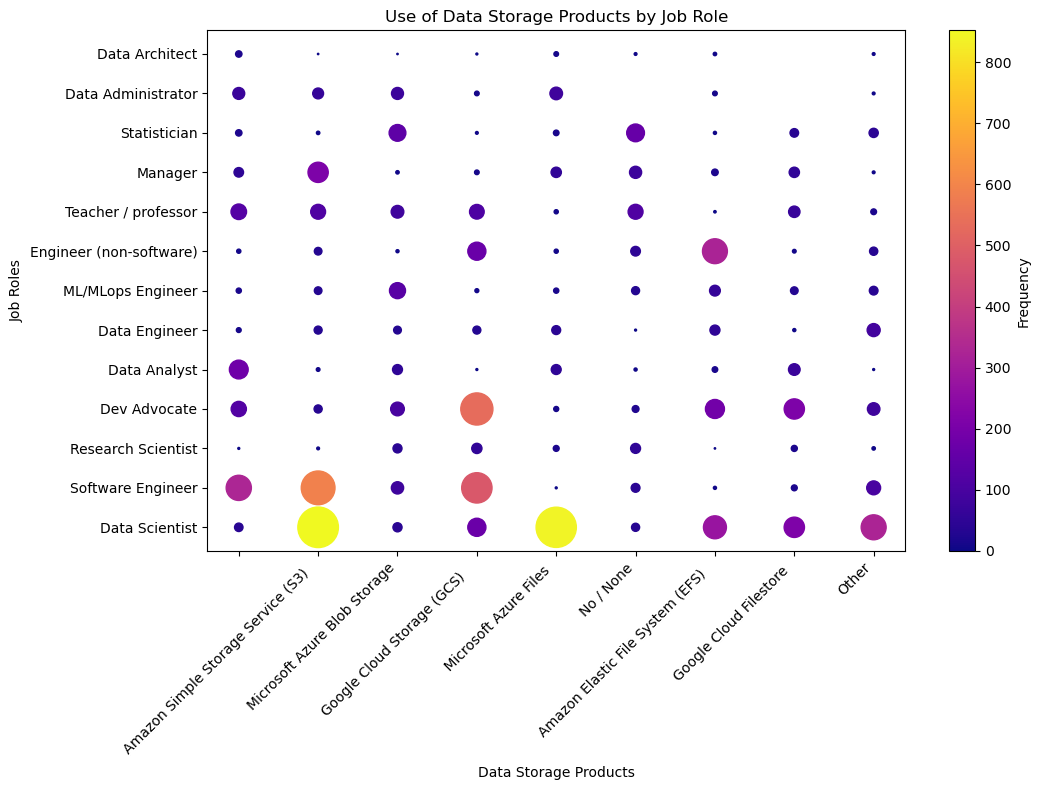

In [45]:
df['Q34'].fillna('N/A', inplace=True)
df.dropna(subset=['Q34'], inplace=True)

# Descomponer la columna 'Q34' en registros separados
df['Q34_split'] = df['Q34'].str.split('=')

# Crear un nuevo DataFrame con registros duplicados
df_Q34 = df.explode('Q34_split')

# Eliminar la columna 'Q34' original
df_Q34.drop(columns=['Q34'], inplace=True)

# Renombrar la columna 'Q34_split' como 'Q34'
df_Q34.rename(columns={'Q34_split': 'Q34'}, inplace=True)

# Seleccionar las columnas 'Q34' y 'Q23' del DataFrame original
df_subset = df[['Q34', 'Q23']].copy()

# Remover las filas con valores nulos en las columnas seleccionadas
df_subset.dropna(subset=['Q34', 'Q23'], inplace=True)

# Dividir los valores en la columna 'Q34'
df_subset['Q34_split'] = df_subset['Q34'].str.split('=')

# Expandir los valores divididos en varias filas
df_unstack = df_subset.explode('Q34_split')

# Contar la frecuencia de las combinaciones de 'Q34_split' y 'Q23'
counts = df_unstack.groupby(['Q34_split', 'Q23']).size().unstack(fill_value=0)

# Obtener los valores únicos de 'Q34' y 'Q23'
Q34_values = df_unstack['Q34_split'].unique()
q23_values = df_unstack['Q23'].unique()

# Crear las coordenadas para el gráfico de dispersión
x_coords = np.arange(len(Q34_values))
y_coords = np.arange(len(q23_values))

# Crear una rejilla de coordenadas
X, Y = np.meshgrid(x_coords, y_coords)

# Aplanar los valores de frecuencia
Z = counts.values.flatten()

# Crear el gráfico de dispersión con área y barra de color
fig, ax = plt.subplots(figsize=(11, 8))
scatter = ax.scatter(X, Y, s=Z, c=Z, cmap='plasma')

# Personalizar el gráfico
ax.set_xticks(x_coords)
ax.set_xticklabels(Q34_values, rotation=45, ha='right')
ax.set_yticks(y_coords)
ax.set_yticklabels(q23_values)
ax.set_xlabel('Data Storage Products')
ax.set_ylabel('Job Roles')
ax.set_title('Use of Data Storage Products by Job Role')

# Añadir una barra de color
cbar = fig.colorbar(scatter)
cbar.set_label('Frequency')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

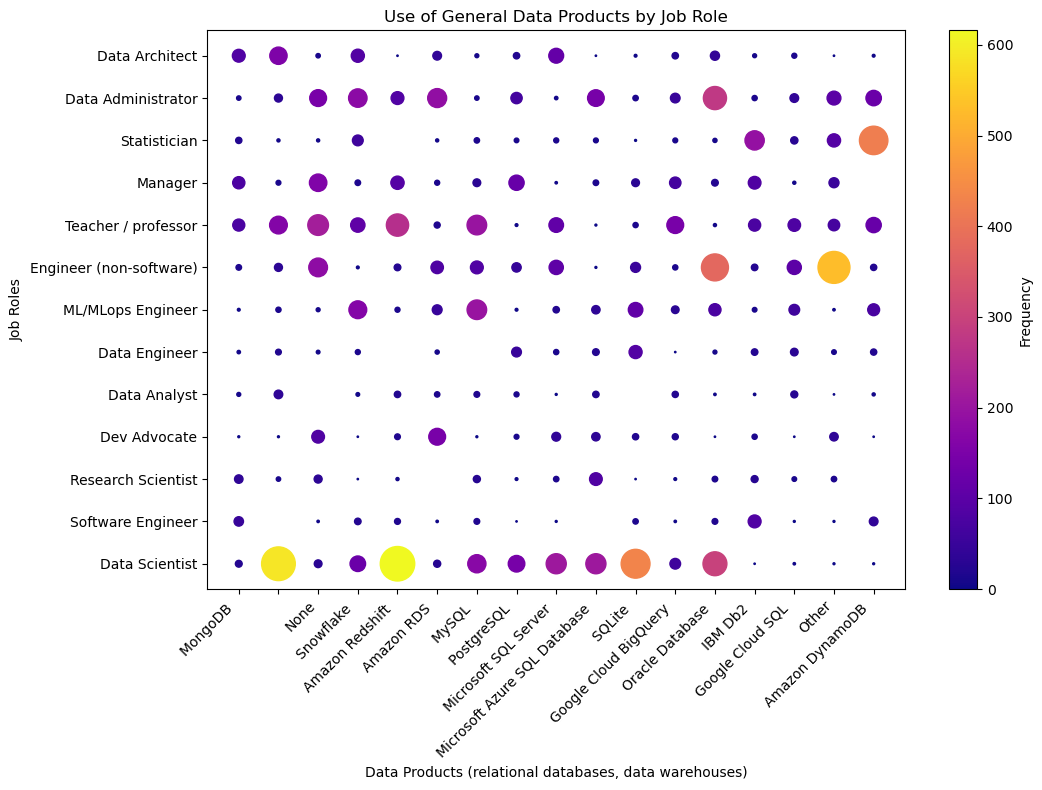

In [46]:
df['Q35'].fillna('N/A', inplace=True)
df.dropna(subset=['Q35'], inplace=True)

# Descomponer la columna 'Q35' en registros separados
df['Q35_split'] = df['Q35'].str.split('=')

# Crear un nuevo DataFrame con registros duplicados
df_Q35 = df.explode('Q35_split')

# Eliminar la columna 'Q35' original
df_Q35.drop(columns=['Q35'], inplace=True)

# Renombrar la columna 'Q35_split' como 'Q35'
df_Q35.rename(columns={'Q35_split': 'Q35'}, inplace=True)

# Seleccionar las columnas 'Q35' y 'Q23' del DataFrame original
df_subset = df[['Q35', 'Q23']].copy()

# Remover las filas con valores nulos en las columnas seleccionadas
df_subset.dropna(subset=['Q35', 'Q23'], inplace=True)

# Dividir los valores en la columna 'Q35'
df_subset['Q35_split'] = df_subset['Q35'].str.split('=')

# Expandir los valores divididos en varias filas
df_unstack = df_subset.explode('Q35_split')

# Contar la frecuencia de las combinaciones de 'Q35_split' y 'Q23'
counts = df_unstack.groupby(['Q35_split', 'Q23']).size().unstack(fill_value=0)

# Obtener los valores únicos de 'Q35' y 'Q23'
Q35_values = df_unstack['Q35_split'].unique()
q23_values = df_unstack['Q23'].unique()

# Crear las coordenadas para el gráfico de dispersión
x_coords = np.arange(len(Q35_values))
y_coords = np.arange(len(q23_values))

# Crear una rejilla de coordenadas
X, Y = np.meshgrid(x_coords, y_coords)

# Aplanar los valores de frecuencia
Z = counts.values.flatten()

# Crear el gráfico de dispersión con área y barra de color
fig, ax = plt.subplots(figsize=(11, 8))
scatter = ax.scatter(X, Y, s=Z, c=Z, cmap='plasma')

# Personalizar el gráfico
ax.set_xticks(x_coords)
ax.set_xticklabels(Q35_values, rotation=45, ha='right')
ax.set_yticks(y_coords)
ax.set_yticklabels(q23_values)
ax.set_xlabel('Data Products (relational databases, data warehouses)')
ax.set_ylabel('Job Roles')
ax.set_title('Use of General Data Products by Job Role')

# Añadir una barra de color
cbar = fig.colorbar(scatter)
cbar.set_label('Frequency')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

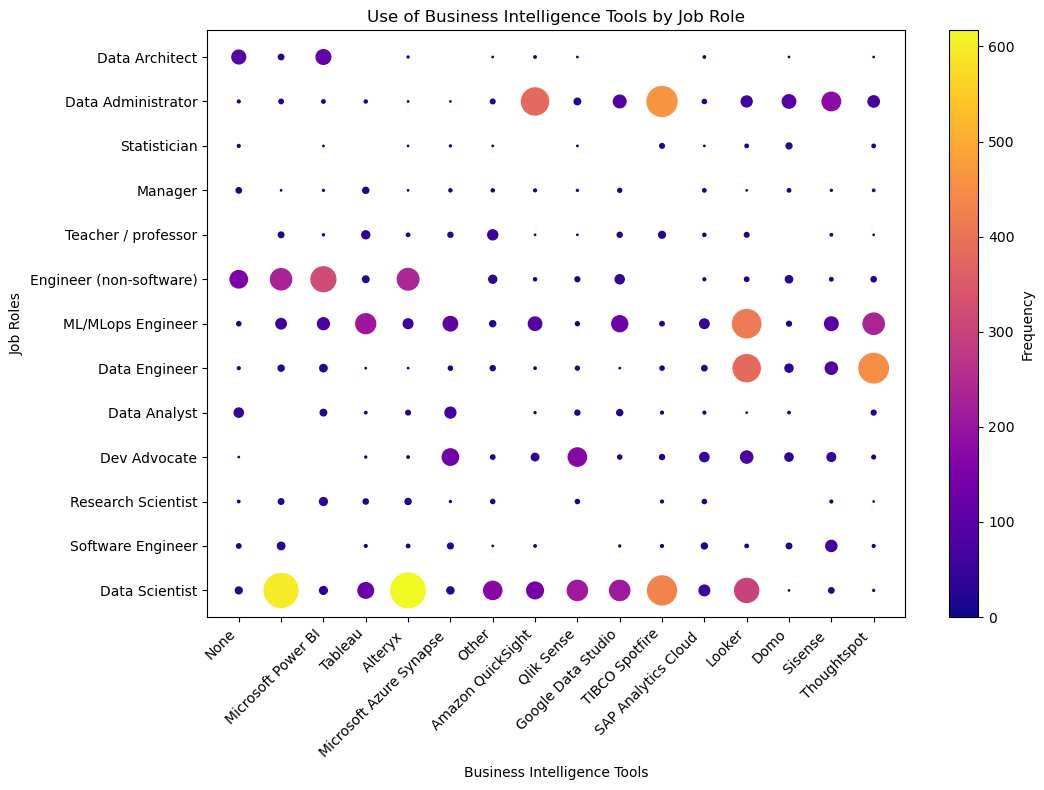

In [47]:
df['Q36'].fillna('N/A', inplace=True)
df.dropna(subset=['Q36'], inplace=True)

# Descomponer la columna 'Q36' en registros separados
df['Q36_split'] = df['Q36'].str.split('=')

# Crear un nuevo DataFrame con registros duplicados
df_Q36 = df.explode('Q36_split')

# Eliminar la columna 'Q36' original
df_Q36.drop(columns=['Q36'], inplace=True)

# Renombrar la columna 'Q36_split' como 'Q36'
df_Q36.rename(columns={'Q36_split': 'Q36'}, inplace=True)

# Seleccionar las columnas 'Q36' y 'Q23' del DataFrame original
df_subset = df[['Q36', 'Q23']].copy()

# Remover las filas con valores nulos en las columnas seleccionadas
df_subset.dropna(subset=['Q36', 'Q23'], inplace=True)

# Dividir los valores en la columna 'Q36'
df_subset['Q36_split'] = df_subset['Q36'].str.split('=')

# Expandir los valores divididos en varias filas
df_unstack = df_subset.explode('Q36_split')

# Contar la frecuencia de las combinaciones de 'Q36_split' y 'Q23'
counts = df_unstack.groupby(['Q36_split', 'Q23']).size().unstack(fill_value=0)

# Obtener los valores únicos de 'Q36' y 'Q23'
Q36_values = df_unstack['Q36_split'].unique()
q23_values = df_unstack['Q23'].unique()

# Crear las coordenadas para el gráfico de dispersión
x_coords = np.arange(len(Q36_values))
y_coords = np.arange(len(q23_values))

# Crear una rejilla de coordenadas
X, Y = np.meshgrid(x_coords, y_coords)

# Aplanar los valores de frecuencia
Z = counts.values.flatten()

# Crear el gráfico de dispersión con área y barra de color
fig, ax = plt.subplots(figsize=(11, 8))
scatter = ax.scatter(X, Y, s=Z, c=Z, cmap='plasma')

# Personalizar el gráfico
ax.set_xticks(x_coords)
ax.set_xticklabels(Q36_values, rotation=45, ha='right')
ax.set_yticks(y_coords)
ax.set_yticklabels(q23_values)
ax.set_xlabel('Business Intelligence Tools')
ax.set_ylabel('Job Roles')
ax.set_title('Use of Business Intelligence Tools by Job Role')

# Añadir una barra de color
cbar = fig.colorbar(scatter)
cbar.set_label('Frequency')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

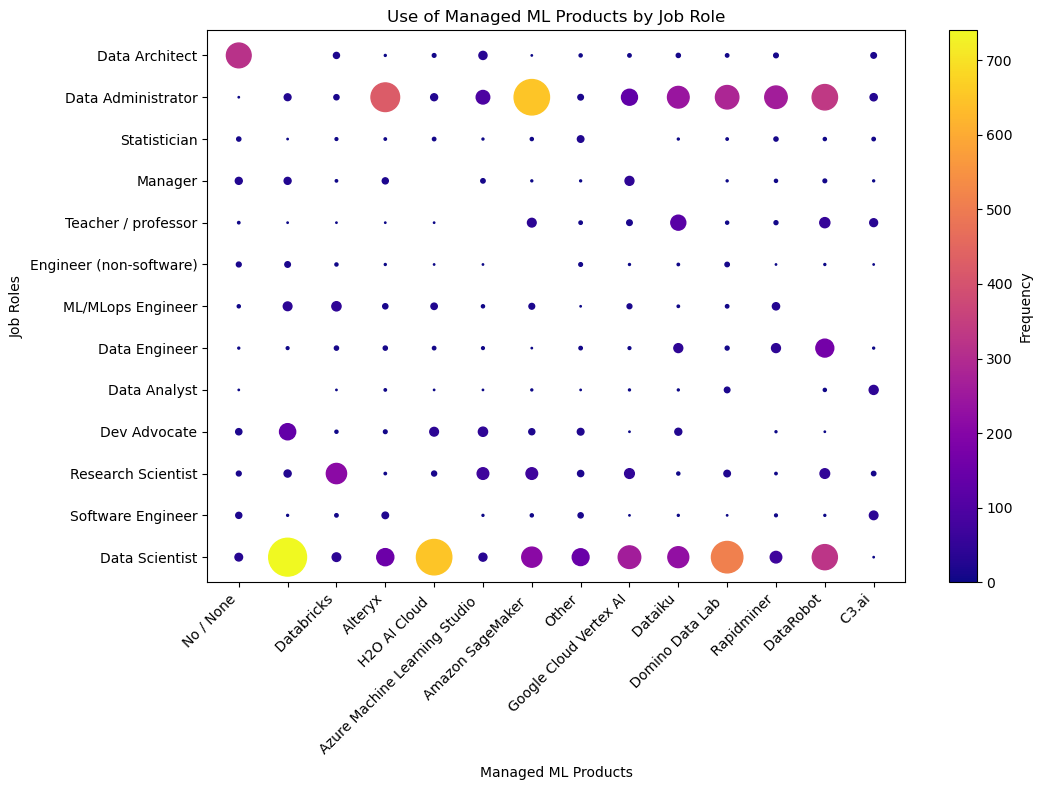

In [48]:
df['Q37'].fillna('N/A', inplace=True)
df.dropna(subset=['Q37'], inplace=True)

# Descomponer la columna 'Q37' en registros separados
df['Q37_split'] = df['Q37'].str.split('=')

# Crear un nuevo DataFrame con registros duplicados
df_Q37 = df.explode('Q37_split')

# Eliminar la columna 'Q37' original
df_Q37.drop(columns=['Q37'], inplace=True)

# Renombrar la columna 'Q37_split' como 'Q37'
df_Q37.rename(columns={'Q37_split': 'Q37'}, inplace=True)

# Seleccionar las columnas 'Q37' y 'Q23' del DataFrame original
df_subset = df[['Q37', 'Q23']].copy()

# Remover las filas con valores nulos en las columnas seleccionadas
df_subset.dropna(subset=['Q37', 'Q23'], inplace=True)

# Dividir los valores en la columna 'Q37'
df_subset['Q37_split'] = df_subset['Q37'].str.split('=')

# Expandir los valores divididos en varias filas
df_unstack = df_subset.explode('Q37_split')

# Contar la frecuencia de las combinaciones de 'Q37_split' y 'Q23'
counts = df_unstack.groupby(['Q37_split', 'Q23']).size().unstack(fill_value=0)

# Obtener los valores únicos de 'Q37' y 'Q23'
Q37_values = df_unstack['Q37_split'].unique()
q23_values = df_unstack['Q23'].unique()

# Crear las coordenadas para el gráfico de dispersión
x_coords = np.arange(len(Q37_values))
y_coords = np.arange(len(q23_values))

# Crear una rejilla de coordenadas
X, Y = np.meshgrid(x_coords, y_coords)

# Aplanar los valores de frecuencia
Z = counts.values.flatten()

# Crear el gráfico de dispersión con área y barra de color
fig, ax = plt.subplots(figsize=(11, 8))
scatter = ax.scatter(X, Y, s=Z, c=Z, cmap='plasma')

# Personalizar el gráfico
ax.set_xticks(x_coords)
ax.set_xticklabels(Q37_values, rotation=45, ha='right')
ax.set_yticks(y_coords)
ax.set_yticklabels(q23_values)
ax.set_xlabel('Managed ML Products')
ax.set_ylabel('Job Roles')
ax.set_title('Use of Managed ML Products by Job Role')

# Añadir una barra de color
cbar = fig.colorbar(scatter)
cbar.set_label('Frequency')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

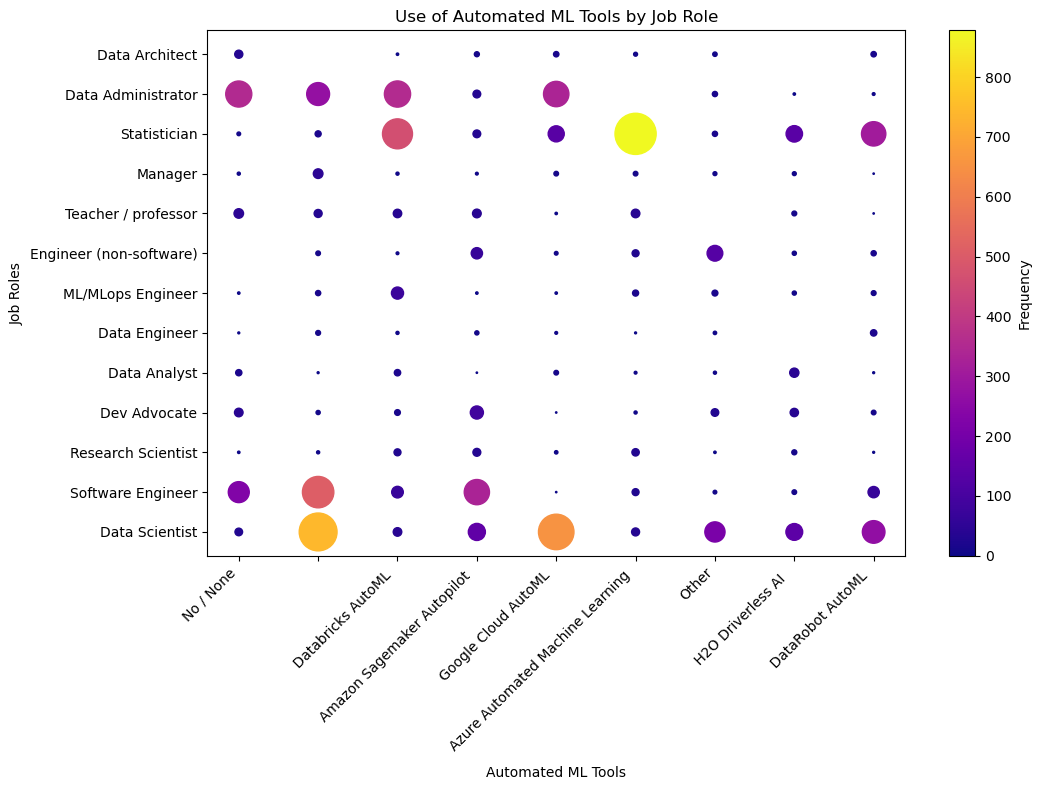

In [49]:
df['Q38'].fillna('N/A', inplace=True)
df.dropna(subset=['Q38'], inplace=True)

# Descomponer la columna 'Q38' en registros separados
df['Q38_split'] = df['Q38'].str.split('=')

# Crear un nuevo DataFrame con registros duplicados
df_Q38 = df.explode('Q38_split')

# Eliminar la columna 'Q38' original
df_Q38.drop(columns=['Q38'], inplace=True)

# Renombrar la columna 'Q38_split' como 'Q38'
df_Q38.rename(columns={'Q38_split': 'Q38'}, inplace=True)

# Seleccionar las columnas 'Q38' y 'Q23' del DataFrame original
df_subset = df[['Q38', 'Q23']].copy()

# Remover las filas con valores nulos en las columnas seleccionadas
df_subset.dropna(subset=['Q38', 'Q23'], inplace=True)

# Dividir los valores en la columna 'Q38'
df_subset['Q38_split'] = df_subset['Q38'].str.split('=')

# Expandir los valores divididos en varias filas
df_unstack = df_subset.explode('Q38_split')

# Contar la frecuencia de las combinaciones de 'Q38_split' y 'Q23'
counts = df_unstack.groupby(['Q38_split', 'Q23']).size().unstack(fill_value=0)

# Obtener los valores únicos de 'Q38' y 'Q23'
Q38_values = df_unstack['Q38_split'].unique()
q23_values = df_unstack['Q23'].unique()

# Crear las coordenadas para el gráfico de dispersión
x_coords = np.arange(len(Q38_values))
y_coords = np.arange(len(q23_values))

# Crear una rejilla de coordenadas
X, Y = np.meshgrid(x_coords, y_coords)

# Aplanar los valores de frecuencia
Z = counts.values.flatten()

# Crear el gráfico de dispersión con área y barra de color
fig, ax = plt.subplots(figsize=(11, 8))
scatter = ax.scatter(X, Y, s=Z, c=Z, cmap='plasma')

# Personalizar el gráfico
ax.set_xticks(x_coords)
ax.set_xticklabels(Q38_values, rotation=45, ha='right')
ax.set_yticks(y_coords)
ax.set_yticklabels(q23_values)
ax.set_xlabel('Automated ML Tools')
ax.set_ylabel('Job Roles')
ax.set_title('Use of Automated ML Tools by Job Role')

# Añadir una barra de color
cbar = fig.colorbar(scatter)
cbar.set_label('Frequency')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

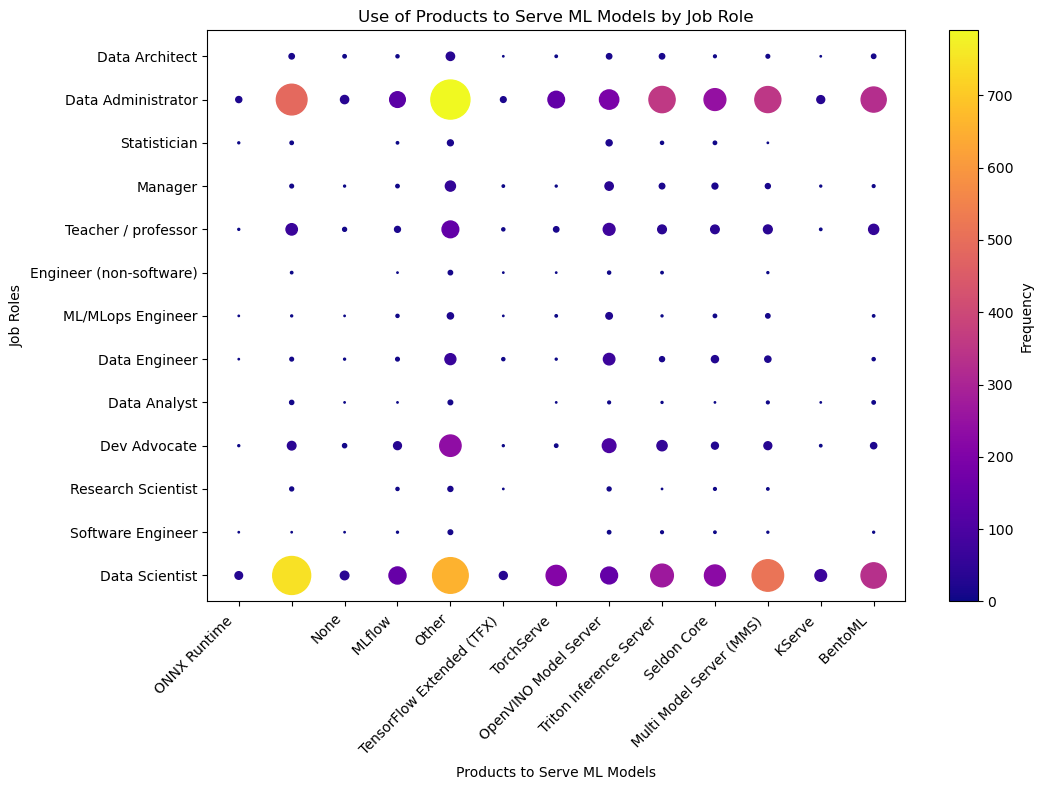

In [50]:
df['Q39'].fillna('N/A', inplace=True)
df.dropna(subset=['Q39'], inplace=True)

# Descomponer la columna 'Q39' en registros separados
df['Q39_split'] = df['Q39'].str.split('=')

# Crear un nuevo DataFrame con registros duplicados
df_Q39 = df.explode('Q39_split')

# Eliminar la columna 'Q39' original
df_Q39.drop(columns=['Q39'], inplace=True)

# Renombrar la columna 'Q39_split' como 'Q39'
df_Q39.rename(columns={'Q39_split': 'Q39'}, inplace=True)

# Seleccionar las columnas 'Q39' y 'Q23' del DataFrame original
df_subset = df[['Q39', 'Q23']].copy()

# Remover las filas con valores nulos en las columnas seleccionadas
df_subset.dropna(subset=['Q39', 'Q23'], inplace=True)

# Dividir los valores en la columna 'Q39'
df_subset['Q39_split'] = df_subset['Q39'].str.split('=')

# Expandir los valores divididos en varias filas
df_unstack = df_subset.explode('Q39_split')

# Contar la frecuencia de las combinaciones de 'Q39_split' y 'Q23'
counts = df_unstack.groupby(['Q39_split', 'Q23']).size().unstack(fill_value=0)

# Obtener los valores únicos de 'Q39' y 'Q23'
Q39_values = df_unstack['Q39_split'].unique()
q23_values = df_unstack['Q23'].unique()

# Crear las coordenadas para el gráfico de dispersión
x_coords = np.arange(len(Q39_values))
y_coords = np.arange(len(q23_values))

# Crear una rejilla de coordenadas
X, Y = np.meshgrid(x_coords, y_coords)

# Aplanar los valores de frecuencia
Z = counts.values.flatten()

# Crear el gráfico de dispersión con área y barra de color
fig, ax = plt.subplots(figsize=(11, 8))
scatter = ax.scatter(X, Y, s=Z, c=Z, cmap='plasma')

# Personalizar el gráfico
ax.set_xticks(x_coords)
ax.set_xticklabels(Q39_values, rotation=45, ha='right')
ax.set_yticks(y_coords)
ax.set_yticklabels(q23_values)
ax.set_xlabel('Products to Serve ML Models')
ax.set_ylabel('Job Roles')
ax.set_title('Use of Products to Serve ML Models by Job Role')

# Añadir una barra de color
cbar = fig.colorbar(scatter)
cbar.set_label('Frequency')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

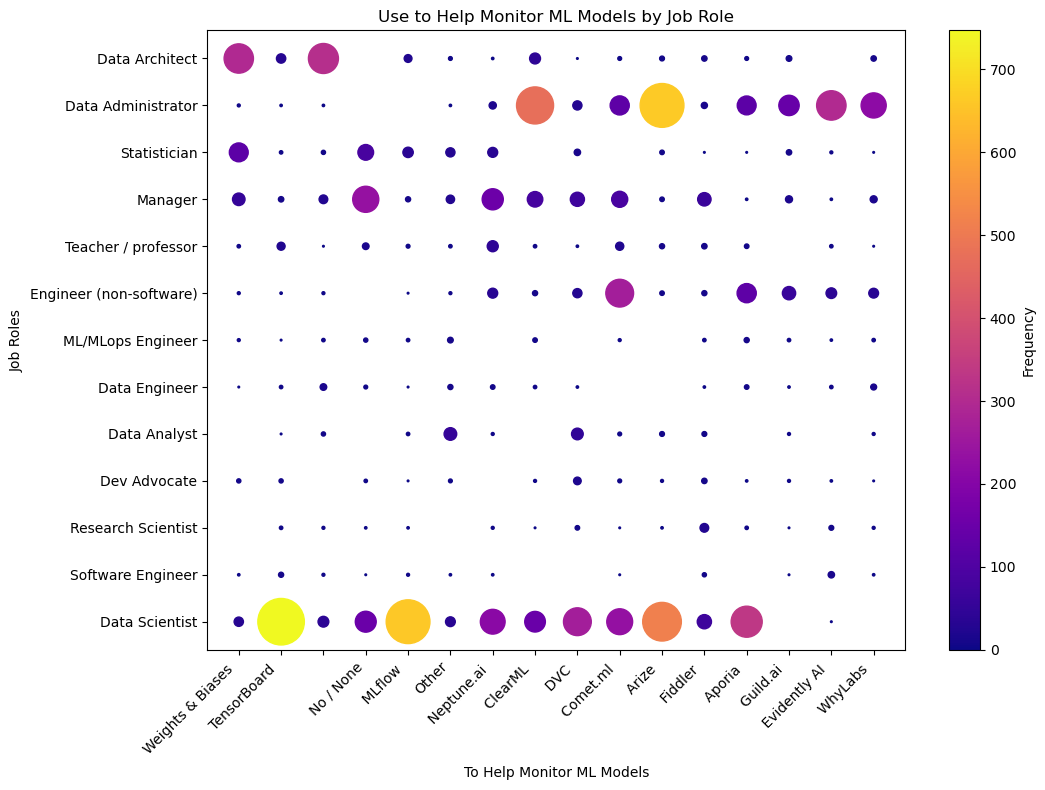

In [51]:
df['Q40'].fillna('N/A', inplace=True)
df.dropna(subset=['Q40'], inplace=True)

# Descomponer la columna 'Q40' en registros separados
df['Q40_split'] = df['Q40'].str.split('=')

# Crear un nuevo DataFrame con registros duplicados
df_Q40 = df.explode('Q40_split')

# Eliminar la columna 'Q40' original
df_Q40.drop(columns=['Q40'], inplace=True)

# Renombrar la columna 'Q40_split' como 'Q40'
df_Q40.rename(columns={'Q40_split': 'Q40'}, inplace=True)

# Seleccionar las columnas 'Q40' y 'Q23' del DataFrame original
df_subset = df[['Q40', 'Q23']].copy()

# Remover las filas con valores nulos en las columnas seleccionadas
df_subset.dropna(subset=['Q40', 'Q23'], inplace=True)

# Dividir los valores en la columna 'Q40'
df_subset['Q40_split'] = df_subset['Q40'].str.split('=')

# Expandir los valores divididos en varias filas
df_unstack = df_subset.explode('Q40_split')

# Contar la frecuencia de las combinaciones de 'Q40_split' y 'Q23'
counts = df_unstack.groupby(['Q40_split', 'Q23']).size().unstack(fill_value=0)

# Obtener los valores únicos de 'Q40' y 'Q23'
Q40_values = df_unstack['Q40_split'].unique()
q23_values = df_unstack['Q23'].unique()

# Crear las coordenadas para el gráfico de dispersión
x_coords = np.arange(len(Q40_values))
y_coords = np.arange(len(q23_values))

# Crear una rejilla de coordenadas
X, Y = np.meshgrid(x_coords, y_coords)

# Aplanar los valores de frecuencia
Z = counts.values.flatten()

# Crear el gráfico de dispersión con área y barra de color
fig, ax = plt.subplots(figsize=(11, 8))
scatter = ax.scatter(X, Y, s=Z*(1.5), c=Z, cmap='plasma')

# Personalizar el gráfico
ax.set_xticks(x_coords)
ax.set_xticklabels(Q40_values, rotation=45, ha='right')
ax.set_yticks(y_coords)
ax.set_yticklabels(q23_values)
ax.set_xlabel('To Help Monitor ML Models')
ax.set_ylabel('Job Roles')
ax.set_title('Use to Help Monitor ML Models by Job Role')

# Añadir una barra de color
cbar = fig.colorbar(scatter)
cbar.set_label('Frequency')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

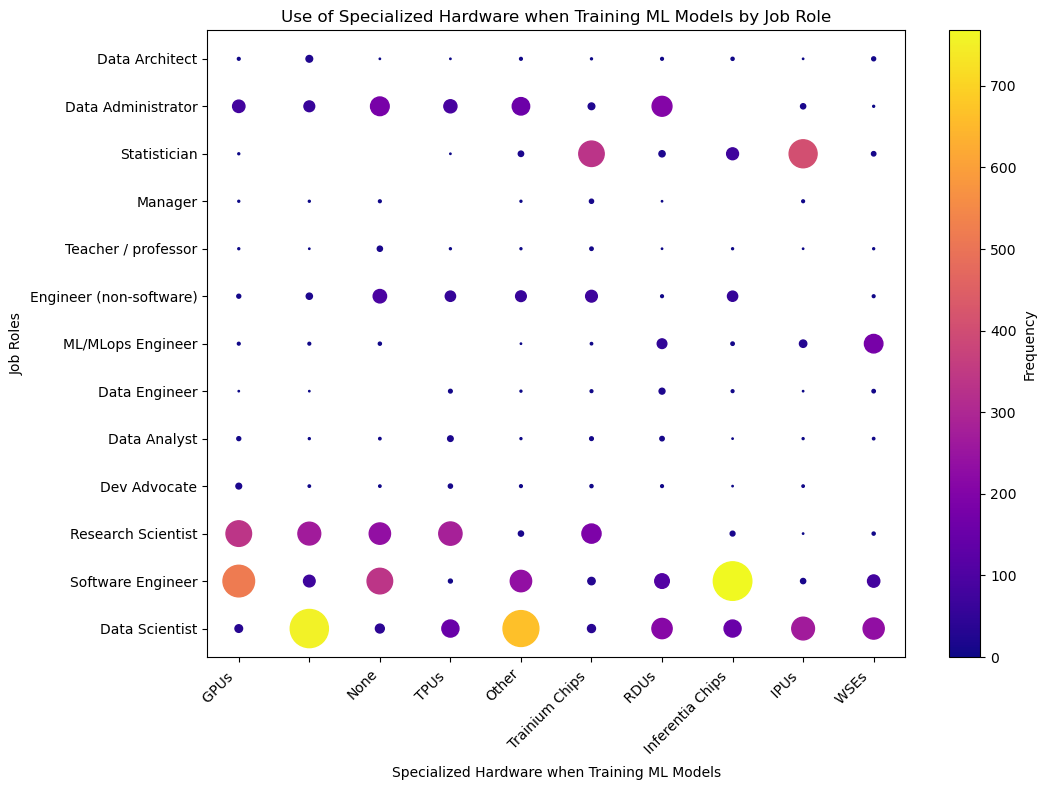

In [52]:
df['Q42'].fillna('N/A', inplace=True)
df.dropna(subset=['Q42'], inplace=True)

# Descomponer la columna 'Q42' en registros separados
df['Q42_split'] = df['Q42'].str.split('=')

# Crear un nuevo DataFrame con registros duplicados
df_Q42 = df.explode('Q42_split')

# Eliminar la columna 'Q42' original
df_Q42.drop(columns=['Q42'], inplace=True)

# Renombrar la columna 'Q42_split' como 'Q42'
df_Q42.rename(columns={'Q42_split': 'Q42'}, inplace=True)

# Seleccionar las columnas 'Q42' y 'Q23' del DataFrame original
df_subset = df[['Q42', 'Q23']].copy()

# Remover las filas con valores nulos en las columnas seleccionadas
df_subset.dropna(subset=['Q42', 'Q23'], inplace=True)

# Dividir los valores en la columna 'Q42'
df_subset['Q42_split'] = df_subset['Q42'].str.split('=')

# Expandir los valores divididos en varias filas
df_unstack = df_subset.explode('Q42_split')

# Contar la frecuencia de las combinaciones de 'Q42_split' y 'Q23'
counts = df_unstack.groupby(['Q42_split', 'Q23']).size().unstack(fill_value=0)

# Obtener los valores únicos de 'Q42' y 'Q23'
Q42_values = df_unstack['Q42_split'].unique()
q23_values = df_unstack['Q23'].unique()

# Crear las coordenadas para el gráfico de dispersión
x_coords = np.arange(len(Q42_values))
y_coords = np.arange(len(q23_values))

# Crear una rejilla de coordenadas
X, Y = np.meshgrid(x_coords, y_coords)

# Aplanar los valores de frecuencia
Z = counts.values.flatten()

# Crear el gráfico de dispersión con área y barra de color
fig, ax = plt.subplots(figsize=(11, 8))
scatter = ax.scatter(X, Y, s=Z, c=Z, cmap='plasma')

# Personalizar el gráfico
ax.set_xticks(x_coords)
ax.set_xticklabels(Q42_values, rotation=45, ha='right')
ax.set_yticks(y_coords)
ax.set_yticklabels(q23_values)
ax.set_xlabel('Specialized Hardware when Training ML Models')
ax.set_ylabel('Job Roles')
ax.set_title('Use of Specialized Hardware when Training ML Models by Job Role')

# Añadir una barra de color
cbar = fig.colorbar(scatter)
cbar.set_label('Frequency')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Conclusions

- More than a third of those surveyed come from India and we must highlight their work and development in this professional and research area.

- Asia is the continent with the greatest development in the field of DS/ML and we can mention that apart from India, Japan and China are countries that stand out for their progress in the STEM field.

- The Computer/Technological industry is the one that contains the largest number of DS/ML professionals worldwide under the most job roles, followed by the academic industry with the specific job role of Teachers.

- Majority of the professionals in this study work in small or small-medium sized companies that allocate very few jobs to these areas.

- The correct evaluation of risks and the application of effective insurance strategies derived from the work of professionals in DS/ML can have a direct impact on the profitability of insurance companies, which is why Insurance is the industry that has the highest average rates. global earnings.

In conclusion, the field of Data Science and Machine Learning relies on a diverse set of tools and technologies to extract insights and build predictive models. From programming languages and development environments to visualization libraries, machine learning frameworks, and specialized hardware, these tools empower data professionals to harness the potential of data and drive innovation in various industries. By understanding and leveraging these tools effectively, practitioners can unlock the power of data and make informed decisions that shape the future of technology and business.